In [1]:
pip install tensorflow tensorflow_hub scikit-learn seaborn plotly nbformat

Note: you may need to restart the kernel to use updated packages.


In [101]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

In [2]:
# Load the Universal Sentence Encoder's TF Hub module
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [4]:
file = '/Users/naima.abdirahman/Downloads/metadata (1).csv'

In [5]:
import pandas as pd
data=pd.read_csv(file)
content=pd.DataFrame(data)
content.head()
content=content[content['hashtags'].notna()]
content=content[content['video_locationcreated']=='US']

KeyError: 'hashtags'

In [6]:

content.head()

video_id      video_timestamp video_duration  \
4   7310000000000000000.0  2023-12-11T20:17:46           62.0   
5   7310000000000000000.0  2023-11-27T16:12:30            6.0   
8   7340000000000000000.0  2024-02-15T18:26:50          167.0   
12  7340000000000000000.0  2024-03-02T14:01:59           14.0   
15  7340000000000000000.0  2024-03-02T08:36:00            0.0   

   video_locationcreated                                    suggested_words  \
4                     US                                                NaN   
5                     US  gail lewis walmart, guy slipping in ice for 15...   
8                     US  Emiliekiser, Emilie, avery and emilie tea, Nai...   
12                    US  Emiliekiser, Emilie, couple, ootd, Couple Outf...   
15                    US  Zodiac Signs, astrology, taurus, Sagittarius, ...   

   video_diggcount video_sharecount video_commentcount video_playcount  \
4          88700.0            295.0               40.0        973800.0   
5        2000000.0         108700.0            19800.0      28900000.0   
8         213700.0            121.0              520.0       1400000.0   
12        269500.0            251.0              579.0       1900000.0   
15         52800.0            764.0              225.0        534700.0   

                                    video_description  ...  \
4   Still unsure what to name this series lol #nyc...  ...   
5   He kept going 😂 (via @Wendy Woods 💕) #snow #cold   ...   
8   I love being delusional🤪🫶🏻🤦🏼‍♀️🤔 SEE YOU GUYS ...  ...   
12  PARADISE🌴✨💗🫶🏻 @Brady #couplesootd #outfitideas...  ...   
15  #zodiac #aries #taurus #gemini #cancer #leo #v...  ...   

       author_username       author_name author_followercount  \
4          kaitlyneats    Kaitlyn Lavery                  NaN   
5                 espn              ESPN                  NaN   
8          emiliekiser            Emilie                  NaN   
12         emiliekiser            Emilie                  NaN   
15  collectiveworld.tc  Collective World                  NaN   

   author_followingcount author_heartcount author_videocount author_diggcount  \
4                    NaN               NaN               NaN              NaN   
5                    NaN               NaN               NaN              NaN   
8                    NaN               NaN               NaN              NaN   
12                   NaN               NaN               NaN              NaN   
15                   NaN               NaN               NaN              NaN   

   author_verified                                           hashtags  \
4            False           nycrestaurants, nycreservations, nycfood   
5             True                                         snow, cold   
8            False  dayinmylife, minivlog, weekdayvlog, nailday, t...   
12           False  couplesootd, outfitideas, ootd, viral, trendin...   
15           False  zodiac, aries, taurus, gemini, cancer, leo, vi...   

    data_user  
4   user_0001  
5   user_0001  
8   user_0001  
12  user_0001  
15  user_0001  

[5 rows x 22 columns]

In [7]:
hashtags=content['hashtags'].tolist()

In [9]:
type(hashtags)

list

In [10]:
import json
hashtags_josn=json.dumps(hashtags)

In [11]:
with open('hash.json', 'w') as json_file:
    json_file.write(hashtags_josn)

In [12]:
hashs=json.load(open('hash.json'))

In [13]:
hashs[:20]

['nycrestaurants, nycreservations, nycfood',
 'snow, cold',
 'dayinmylife, minivlog, weekdayvlog, nailday, trending, viral, momsoftiktok, youngmom, selfcare, fyp, relatable, delusional',
 'couplesootd, outfitideas, ootd, viral, trending, momsoftiktok, youngmom, fyp, nightinmylife, vacation, gifted, husbandandwife, marriage',
 'zodiac, aries, taurus, gemini, cancer, leo, virgo, libra, scorpio, sagittarius, capricorn, aquarius, pisces, astrology, relationships, firesigns, earthsigns, airsigns, watersigns',
 'ellensstardustdiner, reneerapp, snowangel, snowangelreneerapp, fyp',
 'mediaspecialistsoftiktok, middleschoollibrary, mediaspecialist, schoollibrarianlife, schoollibrarian, coverone',
 'nyc, newyork, city, wv',
 'DovePartner, DoveLove',
 'erastourtaylorswift, fyp, taylornation, swifttok, trending, erastour, singapore, taylorswift, surprisesongs, surprisesongstaylorswift, surprisesongserastoursingapore, surprisesongssingapore, surpisesongsaingaporen2, clean, evermoretaylorswift, everm

In [3]:
embedings=embed(hashs)

NameError: name 'embed' is not defined

In [15]:
embedings[0]

<tf.Tensor: shape=(512,), dtype=float32, numpy=
array([ 0.0133257 , -0.05159645,  0.02911617,  0.01373069,  0.079077  ,
        0.00649869,  0.03447568, -0.03724956, -0.10811315, -0.02763745,
        0.01614633, -0.00518586,  0.01273583, -0.02106546, -0.01911943,
        0.01265193, -0.01472009, -0.06863036, -0.00928209, -0.05917082,
        0.04409162,  0.04494167, -0.08284115, -0.03132468,  0.01025788,
        0.06376486, -0.05479564,  0.03494705, -0.00149713,  0.05984623,
        0.04804416,  0.05623557, -0.03357942, -0.01255152,  0.04169806,
        0.01924621, -0.02957628,  0.00770386, -0.08440217,  0.03859921,
       -0.05789883, -0.08651099,  0.03747443, -0.00339361,  0.02655033,
       -0.00916618, -0.0077058 ,  0.00528365, -0.02316101,  0.02974745,
       -0.03220056,  0.06479472, -0.00865576, -0.09427276, -0.06686535,
        0.00882218,  0.00339693, -0.01269967,  0.06824811, -0.0088964 ,
       -0.02165724, -0.04860992, -0.08826284, -0.07694392, -0.04154342,
        0.074805

In [102]:
from sklearn.cluster import KMeans

In [41]:
pip install --upgrade threadpoolctl

  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
Note: you may need to restart the kernel to use updated packages.


In [103]:
k=5
kmeans=KMeans(n_clusters=k, random_state=42)
clusters=kmeans.fit_predict(embedings)

/Users/naima.abdirahman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [107]:
for i in range(k):
    print(f"Cluster {i}:")
    cluster_words = [filtered_word_list[j] for j in range(len(filtered_word_list)) if clusters[j] == i]
    print(cluster_words)

Cluster 0:
['hair care routine, redken acid bonding, Hair Mask, redken, Best Hair Mask, redken shampoo, Acidic Bonding Concentrate Redken, Acidic Bonding Concentrate, Redken Partner, Redken Haircare', 'Transformation Videos, I Feel Pretty Transformation', 'spine decompressing, how to get taller, stretch exercises, Posture, Stretch Exercises Tips, Back Stretches, Spine Training, Growth, Shoulder Stretches, exercise tips', 'bottle service, Grwm Videos, grwm routine, Grwm Routine Videos, Get Ready With Me Make Up, makeup, makeup grwm, GRWM Looks, Get Ready With Me Makeup Routine, Grwm For Work', 'murad acne treatment, pimple patch removal, Skincare routine, acne prone skin, acne skincare routine, salicylic acid, Salicylic Acid Serum, pimple patches, acne patches, Exfoliating Salicylic Acid', 'keloids removal, what is a keloid, pimple patch removal, popping keloids, keloid pop, pimple patches, squeezing keloid, Skincare, acne prone skin, acne patches', 'maybelline moodmaker, Maybelline Sup

In [108]:
from sklearn.manifold import TSNE

In [109]:
tsne = TSNE(n_components=2, random_state=42)  
tsne_results = tsne.fit_transform(embedings)

In [110]:

df = pd.DataFrame(tsne_results, columns=['tsne_1', 'tsne_2'])
df['words'] = filtered_word_list 
df['cluster'] = clusters # the cluster indices where each news hashtags belong
df.head()


tsne_1     tsne_2                                              words  \
0 -43.582375 -22.844040  aquatic hamster, aquatic hamster explained, aq...   
1  16.253653  21.875681  liza koshy, liza koshy musically, musically, f...   
2 -20.057013 -20.527912  nutcracker, Ballet, the nutcracker, russian nu...   
3  40.181568  24.824366  bts inside jokes, i'm sorry for my fault, v ju...   
4  36.066216  24.923805  Wonyoung, karina and wonyoung, mogged, wonyoun...   

   cluster  
0        1  
1        2  
2        1  
3        3  
4        3

In [111]:
import plotly.express as px


In [112]:
# Create the scatter plot
fig = px.scatter(df, x='tsne_1', y='tsne_2', text='words', color="cluster", color_continuous_scale="BlueRed")

# Format what to show next to the markers
fig.update_traces(textposition='top center', 
                  mode='markers+text', 
                  textfont=dict(size=6))

fig.update_layout(title='Embeddings of video suggested words of videos for 10 users', width=800, height=800)
fig.show()

In [25]:
total_rows = len(df)
total_rows

4563

In [113]:

# Define the fraction of data to visualize (e.g., 10%)
fraction_to_visualize = 0.01

# Get the number of rows in your DataFrame
total_rows = len(df)

# Calculate the number of rows to sample
num_rows_to_sample = int(total_rows * fraction_to_visualize)

# If you want to ensure that you don't sample more rows than you have, 
# you can set a maximum limit.
# For example, if you want to visualize a maximum of 1000 rows:
# num_rows_to_sample = min(num_rows_to_sample, 1000)

# Randomly sample rows from the DataFrame
sampled_df = df.sample(n=num_rows_to_sample)  #random_state=42# Set seed 

# Now, 'sampled_df' contains a subset of your original DataFrame 'df'
# You can use 'sampled_df' for visualization

# Example: Plotting sampled data (you can use your preferred plotting library)
fig = px.scatter(sampled_df, x='tsne_1', y='tsne_2', text='words', color="cluster", color_continuous_scale="BlueRed")

# Format what to show next to the markers
fig.update_traces(textposition='top center', 
                  mode='markers+text', 
                  textfont=dict(size=6))

fig.update_layout(title='Embeddings of TikTokh hashtags for 10 users', width=1000, height=1000)
fig.show()


In [114]:

from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer


In [117]:

# Create a DataFrame from the hashtags data
df = pd.DataFrame(filtered_word_list, columns=['suggested_words'])

# Vectorize the hashtags using CountVectorizer (you can use TF-IDF if preferred)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['suggested_words'])



In [118]:
# PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
principal_components = pca.fit_transform(X.toarray())

# Create a DataFrame from the principal components
#pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])



In [119]:
cluster_label=kmeans.fit_predict(principal_components)

/Users/naima.abdirahman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



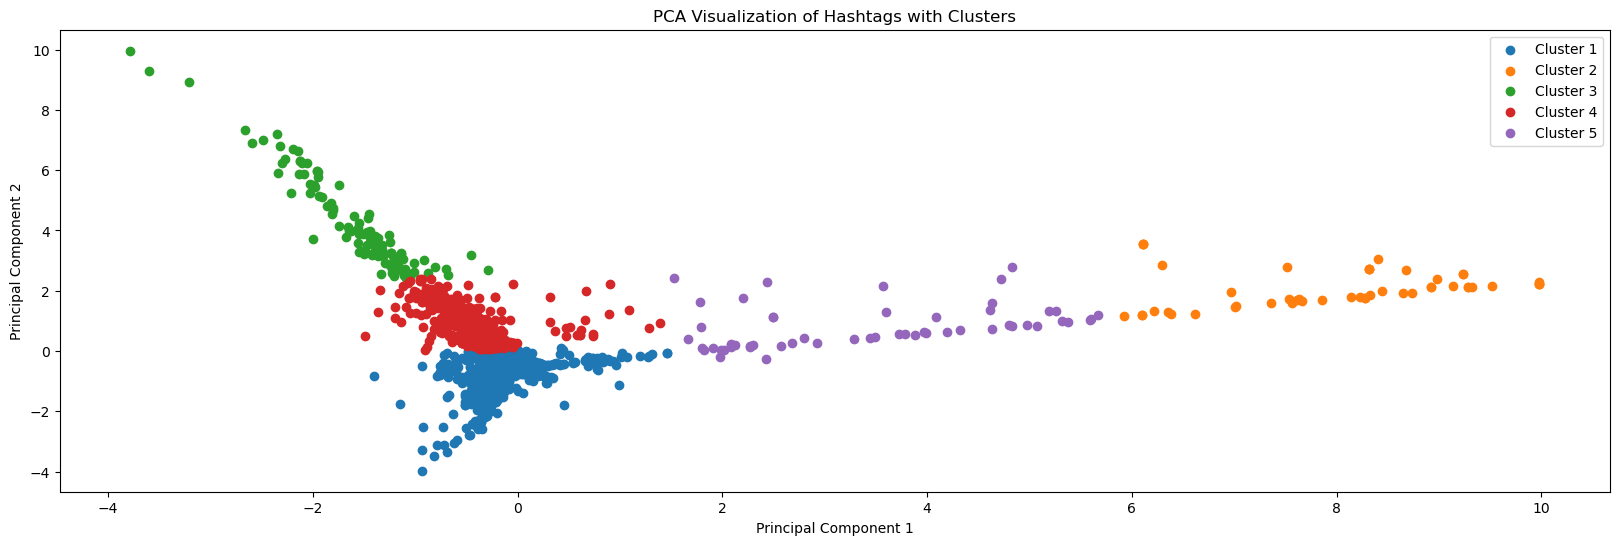

In [120]:
num_clusters=5
# Visualize the results with different colors for each cluster
plt.figure(figsize=(20, 6))
for i in range(num_clusters):
    plt.scatter(principal_components[cluster_label == i, 0], 
                principal_components[cluster_label == i, 1],
                label=f'Cluster {i+1}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Hashtags with Clusters')
plt.legend()
plt.show()


In [76]:
file_path = '/Users/naima.abdirahman/Downloads/metadata (1).csv'
df = pd.read_csv(file_path)

/var/folders/2x/vtjgswgj6pj1xwzfpdt05jt40000gp/T/ipykernel_54166/3965119214.py:2: DtypeWarning:

Columns (0,2,5,6,7,8,10,11,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.



In [78]:
from dateutil.parser import ParserError

try:
    df['video_timestamp'] = pd.to_datetime(df['video_timestamp'])
except ParserError as e:
    print(f"Error: {e}")
    print("Skipping row with problematic 'video_timestamp'")
    df.dropna(subset=['video_timestamp'], inplace=True)

Error: Unknown string format:  The Bachelorette present at position 35595
Skipping row with problematic 'video_timestamp'


In [91]:
df['video_timestamp'] = pd.to_datetime(df['video_timestamp'], errors='coerce')

In [93]:
# Drop rows with NaT values
df.dropna(subset=['video_timestamp'], inplace=True)

In [94]:
# Set 'video_timestamp' column as the index
#df.set_index('video_timestamp', inplace=True)

In [ ]:
# Filter data for the year 2023
df = df[df.index.year == 2023]

In [106]:
# Resample the DataFrame by month and count the number of entries for each month
video_df_monthly = df.resample('M').count()
video_df_monthly 

video_id  video_duration  video_locationcreated  \
video_timestamp                                                    
2023-01-31            206             206                    196   
2023-02-28            181             181                    171   
2023-03-31            216             216                    208   
2023-04-30            230             230                    230   
2023-05-31            306             306                    304   
2023-06-30            341             341                    306   
2023-07-31            383             383                    363   
2023-08-31            547             547                    513   
2023-09-30            930             930                    881   
2023-10-31           1045            1045                    930   
2023-11-30           2373            2373                   2156   
2023-12-31           6557            6558                   6558   

                 suggested_words  video_diggcount  video_sharecount  \
video_timestamp                                                       
2023-01-31                    97              206               206   
2023-02-28                    93              181               181   
2023-03-31                   109              216               216   
2023-04-30                   119              230               230   
2023-05-31                   182              306               306   
2023-06-30                   196              341               341   
2023-07-31                   220              383               383   
2023-08-31                   320              547               547   
2023-09-30                   397              930               930   
2023-10-31                   484             1045              1045   
2023-11-30                  1179             2373              2373   
2023-12-31                  3774             6558              6558   

                 video_commentcount  video_playcount  video_description  \
video_timestamp                                                           
2023-01-31                      206              206                201   
2023-02-28                      181              181                179   
2023-03-31                      216              216                210   
2023-04-30                      230              230                221   
2023-05-31                      306              306                299   
2023-06-30                      341              341                330   
2023-07-31                      383              383                370   
2023-08-31                      547              547                535   
2023-09-30                      930              930                896   
2023-10-31                     1045             1045                999   
2023-11-30                     2373             2373               2288   
2023-12-31                     6558             6558               6190   

                 video_is_ad  ...  author_username  author_name  \
video_timestamp               ...                                 
2023-01-31               206  ...              206          206   
2023-02-28               181  ...              181          181   
2023-03-31               216  ...              216          216   
2023-04-30               230  ...              230          230   
2023-05-31               306  ...              306          306   
2023-06-30               341  ...              341          341   
2023-07-31               383  ...              383          383   
2023-08-31               547  ...              547          547   
2023-09-30               930  ...              930          930   
2023-10-31              1045  ...             1045         1044   
2023-11-30              2373  ...             2373         2373   
2023-12-31              6558  ...             6558         6557   

                 author_followercount  author_followingcount  \
video_timestamp

In [101]:
from numpy.linalg import norm

def cosineSimilarity(vec1, vec2):
    """Calculate the cosine similarity between two vectors."""
    V1 = np.array(vec1)
    V2 = np.array(vec2)
    cosine = np.dot(V1, V2)/(norm(V1)*norm(V2))
    return cosine

In [ ]:
def pairwiseSimilarity(embedings):
    """Given a matrix of embeddings for words or sentences,
    calculate the cosine similarity for each pair.
    """
    simMatrix = []
    for vec1 in embedings:
        simRow = []
        for vec2 in embedings:
            simRow.append(cosineSimilarity(vec1, vec2))
        simMatrix.append(simRow)
    return simMatrix
    
simMatrix = pairwiseSimilarity(embedings)
print(simMatrix)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def drawHeatmap(labels, simMtrx, plotTitle):
    """Draws a heatmap for the similarity matrix.
    """
    sns.set(font_scale=0.9)
    g = sns.heatmap(
          simMtrx, # similarity matrix with the cosine sim values
          xticklabels=labels,
          yticklabels=labels,
          vmin=0,
          vmax=1,
          cmap="YlOrRd")
    g.set_xticklabels(labels, rotation=90)
    g.set_title(plotTitle, fontsize=14)
    plt.show()

In [ ]:
df.head()

In [ ]:
#INDIVIDUAL CLUSTERING 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


In [76]:
file2 = '/Users/naima.abdirahman/Downloads/project3data/Sec2Gr3_77217.csv'

user1= pd.read_csv(file2)


In [77]:
word_list=user1['suggested_words'].notna()
#word_list=word_list[word_list['video_locationcreated']=='US']
word_list=word_list.tolist()

In [22]:
user1

video_id      video_timestamp  video_duration  \
0      7308913410413055262  2023-12-04T20:17:04           381.0   
1      7299469698821885226  2023-11-09T09:30:39            60.0   
2      7309289501279489323  2023-12-05T20:36:34            14.0   
3      7306241104838446378  2023-11-27T15:27:12            31.0   
4      7308781653936164138  2023-12-04T11:45:46            14.0   
...                    ...                  ...             ...   
15419  7286851824517172512  2023-10-06T10:26:48             9.0   
15420  7287679051513236778  2023-10-08T15:56:58            23.0   
15421  7285017049003199777  1969-12-31T19:00:00             NaN   
15422  7285808871522766113  1969-12-31T19:00:00             NaN   
15423  7285436255976951042  2023-10-02T14:53:47             0.0   

      video_locationcreated  \
0                        US   
1                        US   
2                        US   
3                        US   
4                        US   
...                     ...   
15419                    DE   
15420                    US   
15421                   NaN   
15422                   NaN   
15423                    SG   

                                         suggested_words  video_diggcount  \
0                                                    NaN         502000.0   
1                                                    NaN          19500.0   
2                                                    NaN            489.0   
3                                                    NaN           3809.0   
4      aquatic hamster, aquatic hamster explained, aq...        2900000.0   
...                                                  ...              ...   
15419                                                NaN         213500.0   
15420                                                NaN           6039.0   
15421                                                NaN              NaN   
15422                                                NaN              NaN   
15423                                                NaN          38800.0   

       video_sharecount  video_commentcount  video_playcount  \
0                 698.0               872.0       11600000.0   
1                 277.0               365.0        1600000.0   
2                  56.0                11.0         136900.0   
3                 200.0                63.0         572700.0   
4               63800.0             21400.0       52600000.0   
...                 ...                 ...              ...   
15419            5867.0              2259.0         862000.0   
15420              10.0                42.0          96700.0   
15421               NaN                 NaN              NaN   
15422               NaN                 NaN              NaN   
15423             573.0                62.0         171100.0   

                                       video_description  video_is_ad  \
0      Grey’s Anatomy; Perfect Penny..Pt 1 Szn 12 epi...        False   
1       #hamsterfish #viralvintage #hamstertok #fishtok         False   
2      Fish tank hamster cage, crazy illusion #fyp #f...        False   
3                   How is that even possible!!🤔 #reels         False   
4       The little hamster lives in a fish tank 小仓鼠住在鱼缸里        False   
...                                                  ...          ...   
15419          jumping off a cliff rq #fyp #wavetoearth         False   
15420  the screams for cinna and finick GAH #hungerga...        False   
15421                                                NaN        False   
15422                                                NaN        False   
15423  drawing one of my favourite tweets as these pe...        False   

       video_stickers   author_username    author_name  author_followercount  \
0                 NaN         moviess1q    Moviesaz12q                   NaN   
1                 NaN      viralvintage  viral history                   NaN   
2                 NaN      .b

In [78]:
import pandas as pd
userr=pd.read_csv(file2)
content=pd.DataFrame(userr)
content.head()
content=content[content['suggested_words'].notna()]
content=content[content['video_locationcreated']=='US']

In [79]:
word_list=content['suggested_words'].tolist()

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [81]:
# List of words


#word_list = ["apple", "banana", "orange", "grape", "kiwi", "pineapple", "strawberry", "blueberry", "watermelon"]

# Convert the list of words into a format suitable for clustering
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(word_list)

# Define the number of clusters
k = 5

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)



/Users/naima.abdirahman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5, random_state=42)

In [82]:
# Print the clusters
for cluster_num in range(k):
    cluster_words = []
    for i, label in enumerate(kmeans.labels_):
        if label == cluster_num:
            cluster_words.append(word_list[i])
    print(f"Cluster {cluster_num + 1}: {cluster_words}")

Cluster 1: ['Cat Vision, Cat Vision Filter, christmas, Dog Vision Filters, How Dogs See The World, Christmas Tree, Rabbit Vision, christmas songs, Dogs Vision, christmas countdown', 'Black Cats, Tuxedo Cat, orange cat, orange cat behavior, Russian Blue Cat, White Cat, Black And White Cat, Black Kittens, Cat Personality Types, Types Of Cats', 'Reservation Dogs, big hill rezdogs, big and bev, Rez Dog, big hill, big hill and bev, funny Dogs Videos, Funny Dogs, Big Dogs Of TikTok, Dogs Funny Moments', 'reservation dogs, big and bev, bev walks in on big, Reservation Dogs Funny Moments, Dog Funny Videos, Rez Dog, dog receptionist, Funny Dogs Moments, Funny Dogs, Funny Dog Clips', 'william knifeman, Reservation Dogs, Reservation Dogs Funny Moments, dallas goldtooth, Rez Dog, Native, Dog Adoption, dogs crying, william knifeman scream, Dog Show', 'Rez Dog, Reservation Dogs, DogTok, dog of tiktok, Dog Community, Native TikTok, reservation native, Native TikTok Videos, Native, Dog Breeds', 'Rez D

In [31]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.4/172.4 kB 2.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [93]:
# Convert the list of words into a format suitable for clustering
vectorizer = TfidfVectorizer(stop_words='english', use_idf=True)
X = vectorizer.fit_transform(word_list)

# Define the number of clusters
k = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)



KMeans(n_clusters=3, random_state=42)

In [151]:
def elbowMethod(embeddings, maxK):
    """
    Implements the Elbow method for finding most optimal k.
    It keeps track of a measure named "inertia" for each cluster.
    """
    sumSquaredDistances = []
    kValues = list(range(1, maxK))
    for k in kValues:
        km = KMeans(n_clusters=k, random_state=42)
        km = km.fit(embeddings)
        sumSquaredDistances.append(km.inertia_)
    
    # plot the line to identify the elbow
    plt.plot(kValues, sumSquaredDistances, 'ro-')
    plt.xlabel('k')
    plt.xticks(kValues)
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

/Users/naima.abdirahman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/naima.abdirahman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/naima.abdirahman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/naima.abdirahman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/naima.abdirahman/anaconda3/li

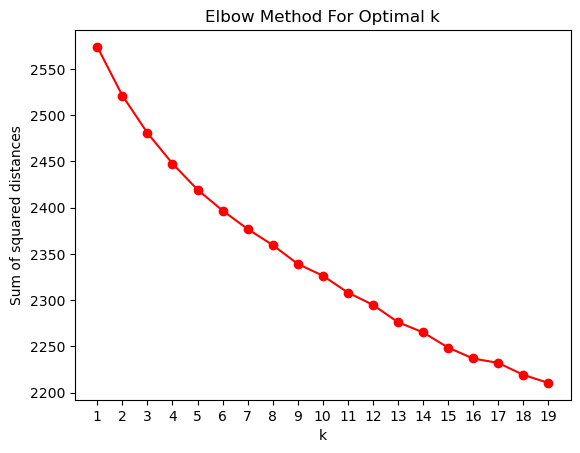

In [152]:
elbowMethod(embedings, 20)
#In this plot, inertia stops rapidly decreasing at the k=3 and enters a phase of steady decline. So we will pick k=3.

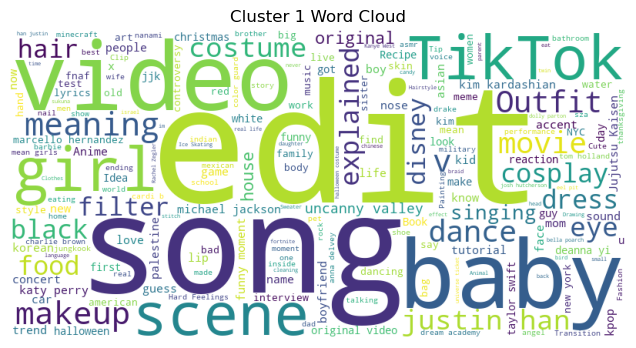

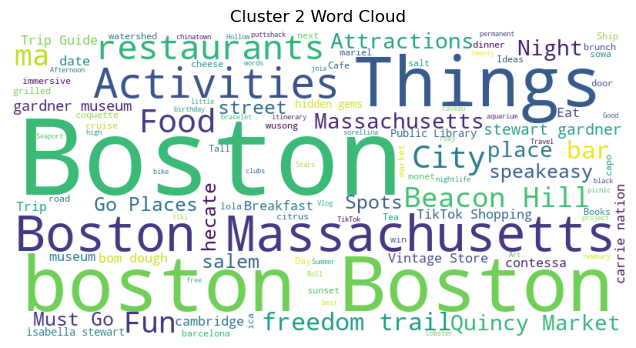

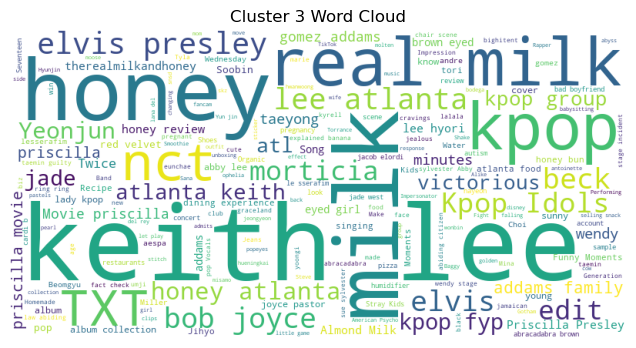

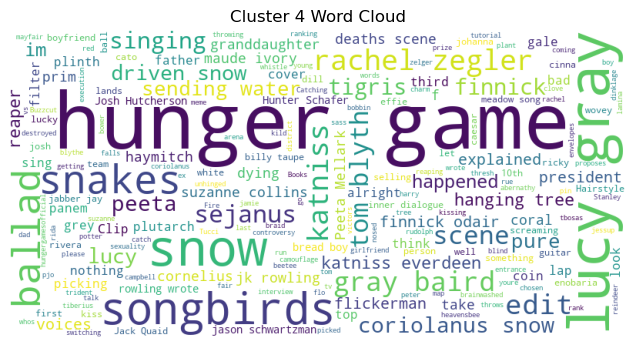

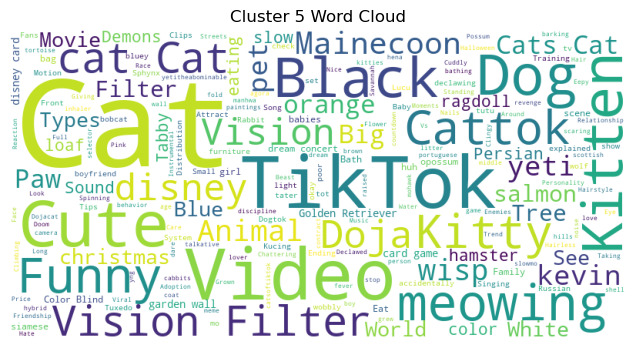

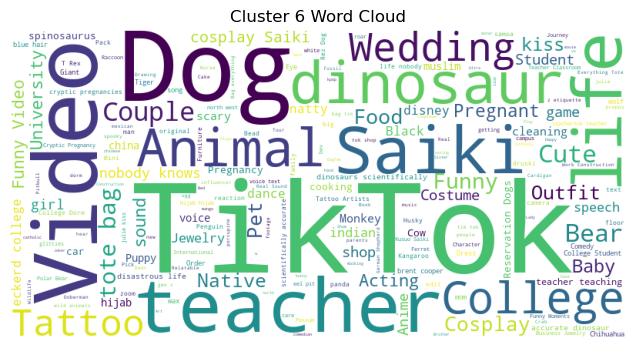

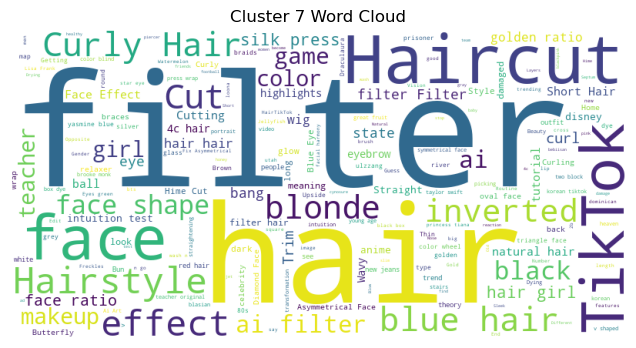

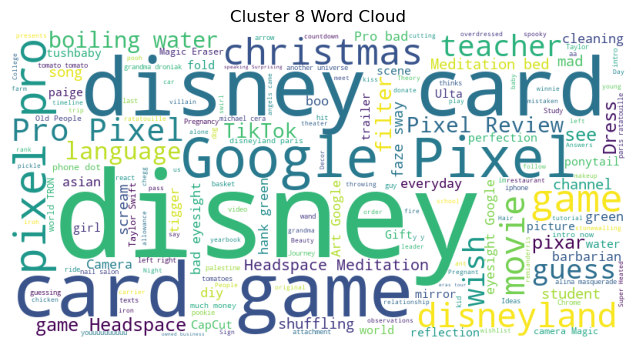

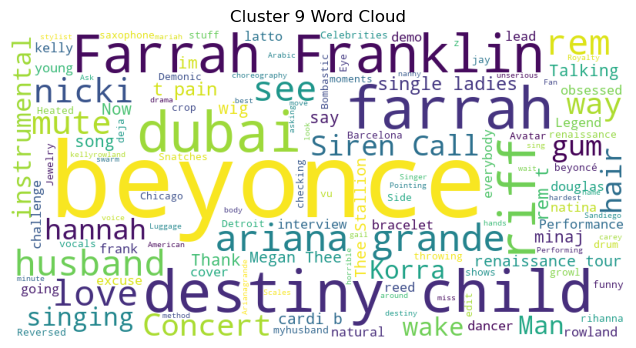

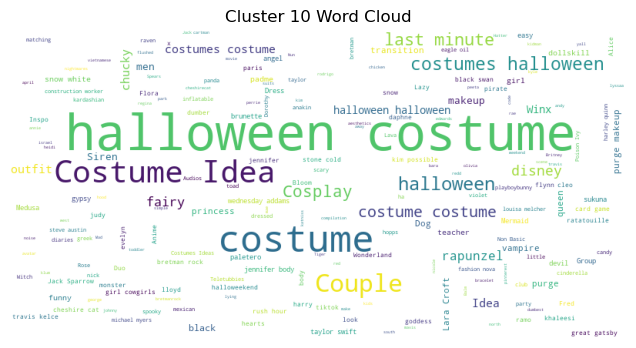

In [153]:

# Words to remove
words_to_remove = ['fyp','FYP','Fyp' 'foryou','FORYOU' 'tiktok', 'viral', 'trending','TikTok']

# Remove specified words from the word list
filtered_word_list = [word for word in word_list if word not in words_to_remove]

# Convert the filtered list of words into a format suitable for clustering
vectorizer = TfidfVectorizer(stop_words='english', use_idf=True)
X = vectorizer.fit_transform(filtered_word_list)

# Define the number of clusters
k = 10

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Plot word clouds for each cluster
for cluster_num in range(k):
    cluster_words = ""
    for i, label in enumerate(kmeans.labels_):
        if label == cluster_num:
            cluster_words += filtered_word_list[i] + " "
    wordcloud = WordCloud(width=800, height=400, background_color ='white', min_font_size = 5).generate(cluster_words)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud)
    plt.title(f"Cluster {cluster_num + 1} Word Cloud")
    plt.axis("off")
    plt.show()

In [146]:
from sklearn.decomposition import LatentDirichletAllocation


In [158]:
# Initialize a dictionary to store topics for each cluster
cluster_topics = {}

# Initialize the number of topics for LDA
num_topics = 3  # Adjust as needed

# Perform LDA for each cluster
for cluster_num in range(k):
    # Get the most frequent words for the current cluster
    cluster_words = [filtered_word_list[i] for i, label in enumerate(kmeans.labels_) if label == cluster_num]
    word_counts = Counter(cluster_words)
    most_frequent_words = [word for word, _ in word_counts.most_common(10)]  # Adjust the number of words as needed
    
    # Vectorize the most frequent words
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(most_frequent_words)
    
    # Fit LDA model
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(tfidf_matrix)
    
    # Extract topics learned by LDA
    topics = []
    for topic_idx, topic in enumerate(lda.components_):
        top_words_idx = topic.argsort()[:-6:-1]  # Get indices of top 5 words for each topic
        top_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in top_words_idx]
        topics.append(top_words)
    
    # Store topics for the cluster
    cluster_topics[cluster_num] = topics

#find most dominant 

In [163]:
print(tfidf_matrix)

  (0, 47)	0.1816899050284996
  (0, 36)	0.1816899050284996
  (0, 37)	0.1816899050284996
  (0, 1)	0.12013859955556307
  (0, 43)	0.1351281398984672
  (0, 39)	0.20152328294440314
  (0, 2)	0.1816899050284996
  (0, 87)	0.1816899050284996
  (0, 67)	0.1816899050284996
  (0, 75)	0.1816899050284996
  (0, 79)	0.1816899050284996
  (0, 12)	0.1816899050284996
  (0, 26)	0.6045698488332094
  (0, 28)	0.3633798100569992
  (0, 50)	0.3633798100569992
  (1, 30)	0.16528416043951538
  (1, 70)	0.22223693329557542
  (1, 34)	0.22223693329557542
  (1, 64)	0.22223693329557542
  (1, 3)	0.22223693329557542
  (1, 27)	0.13196892400663052
  (1, 60)	0.22223693329557542
  (1, 71)	0.22223693329557542
  (1, 57)	0.22223693329557542
  (1, 85)	0.18892169686269056
  :	:
  (7, 26)	0.17208427295782164
  (8, 25)	0.2297578197466836
  (8, 13)	0.2297578197466836
  (8, 88)	0.2297578197466836
  (8, 11)	0.2297578197466836
  (8, 16)	0.4595156394933672
  (8, 9)	0.1953151374541571
  (8, 38)	0.1953151374541571
  (8, 86)	0.1953151374541571

In [159]:
# Print topics for each cluster
for cluster_num, topics in cluster_topics.items():
    print(f"Cluster {cluster_num + 1} Topics:")
    for i, topic in enumerate(topics):
        print(f"Topic {i + 1}: {', '.join(topic)}")
    print()


Cluster 1 Topics:
Topic 1: pizza, south, got, africa, game
Topic 2: thanksgiving, asmr, disease, deer, satisfying
Topic 3: valley, uncanny, roommate, halloween, deanna

Cluster 2 Topics:
Topic 1: spots, hecate, things, activities, massachusetts
Topic 2: boston, things, day, city, beacon
Topic 3: boston, food, hecate, speakeasy, bar

Cluster 3 Topics:
Topic 1: kpop, autism, hyori, lesserafim, sserafim
Topic 2: milk, honey, keith, lee, real
Topic 3: priscilla, sunny, bun, movie, honey

Cluster 4 Topics:
Topic 1: lucy, gray, baird, ballad, alright
Topic 2: hunger, games, peeta, snow, katniss
Topic 3: zegler, rachel, lucy, snow, singing

Cluster 5 Topics:
Topic 1: cat, hamster, movie, tiktok, opossum
Topic 2: cat, yeti, vision, christmas, siamese
Topic 3: cat, funny, wall, garden, black

Cluster 6 Topics:
Topic 1: tattoo, teacher, animals, cute, baby
Topic 2: construction, couples, family, couple, pit
Topic 3: acting, teeth, kangaroo, scary, pick

Cluster 7 Topics:
Topic 1: hair, curly, wa

In [160]:
from collections import Counter

# Initialize a dictionary to store the topic distributions for each cluster
cluster_topic_distributions = {}

# Assuming you have the topics stored in a dictionary named cluster_topics
# Assuming each cluster's topics are represented as lists of words
for cluster_num, topics in cluster_topics.items():
    # Assuming each topic is represented as a list of words
    # Count the occurrences of each topic word in the entire set of topics
    topic_counts = Counter(word for topic in topics for word in topic)
    
    # Calculate the total count of all words in the topics
    total_topic_words = sum(topic_counts.values())
    
    # Calculate the topic distribution as percentages
    topic_distribution = {word: count / total_topic_words * 100 for word, count in topic_counts.items()}
    
    # Store the topic distribution for the cluster
    cluster_topic_distributions[cluster_num] = topic_distribution

# Get the most popular topic and percentages of topics for each cluster
for cluster_num, topic_distribution in cluster_topic_distributions.items():
    print(f"Cluster {cluster_num + 1} Topic Distribution:")
    total_words = sum(topic_distribution.values())
    most_popular_topic, most_popular_topic_percentage = max(topic_distribution.items(), key=lambda x: x[1])
    print(f"Most Popular Topic: {most_popular_topic}")
    print(f"Percentage of Words for Most Popular Topic: {most_popular_topic_percentage:.2f}%")
    for topic, percentage in topic_distribution.items():
        print(f"Topic: {topic}, Percentage: {percentage:.2f}%")
    print()


Cluster 1 Topic Distribution:
Most Popular Topic: pizza
Percentage of Words for Most Popular Topic: 6.67%
Topic: pizza, Percentage: 6.67%
Topic: south, Percentage: 6.67%
Topic: got, Percentage: 6.67%
Topic: africa, Percentage: 6.67%
Topic: game, Percentage: 6.67%
Topic: thanksgiving, Percentage: 6.67%
Topic: asmr, Percentage: 6.67%
Topic: disease, Percentage: 6.67%
Topic: deer, Percentage: 6.67%
Topic: satisfying, Percentage: 6.67%
Topic: valley, Percentage: 6.67%
Topic: uncanny, Percentage: 6.67%
Topic: roommate, Percentage: 6.67%
Topic: halloween, Percentage: 6.67%
Topic: deanna, Percentage: 6.67%

Cluster 2 Topic Distribution:
Most Popular Topic: hecate
Percentage of Words for Most Popular Topic: 13.33%
Topic: spots, Percentage: 6.67%
Topic: hecate, Percentage: 13.33%
Topic: things, Percentage: 13.33%
Topic: activities, Percentage: 6.67%
Topic: massachusetts, Percentage: 6.67%
Topic: boston, Percentage: 13.33%
Topic: day, Percentage: 6.67%
Topic: city, Percentage: 6.67%
Topic: beaco

In [49]:
# Load the Universal Sentence Encoder's TF Hub module
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")


In [95]:
embedings=embed(filtered_word_list)

In [96]:
k=5
kmeans=KMeans(n_clusters=k, random_state=42)
clusters=kmeans.fit_predict(embedings)

/Users/naima.abdirahman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [97]:
#tsne = TSNE(n_components=2, random_state=42)  
#tsne_results = tsne.fit_transform(embedings)
# Reduce dimensionality for visualization using t-SNE with adjusted parameters
tsne = TSNE(n_components=2, perplexity=10, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(embedings)



In [123]:


# Assuming you have kmeans.labels_, filtered_word_list, and k defined

# Initialize a dictionary to store word clouds for each cluster
cluster_wordclouds = {}

# Plot word clouds for each cluster
for cluster_num in range(k):
    cluster_words = ""
    for i, label in enumerate(kmeans.labels_):
        if label == cluster_num:
            cluster_words += filtered_word_list[i] + " "
    wordcloud = WordCloud(width=800, height=400, background_color='white', min_font_size=5).generate(cluster_words)
    cluster_wordclouds[cluster_num] = wordcloud



In [144]:
wordcloud

/var/folders/2x/vtjgswgj6pj1xwzfpdt05jt40000gp/T/ipykernel_66260/3915735688.py:28: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



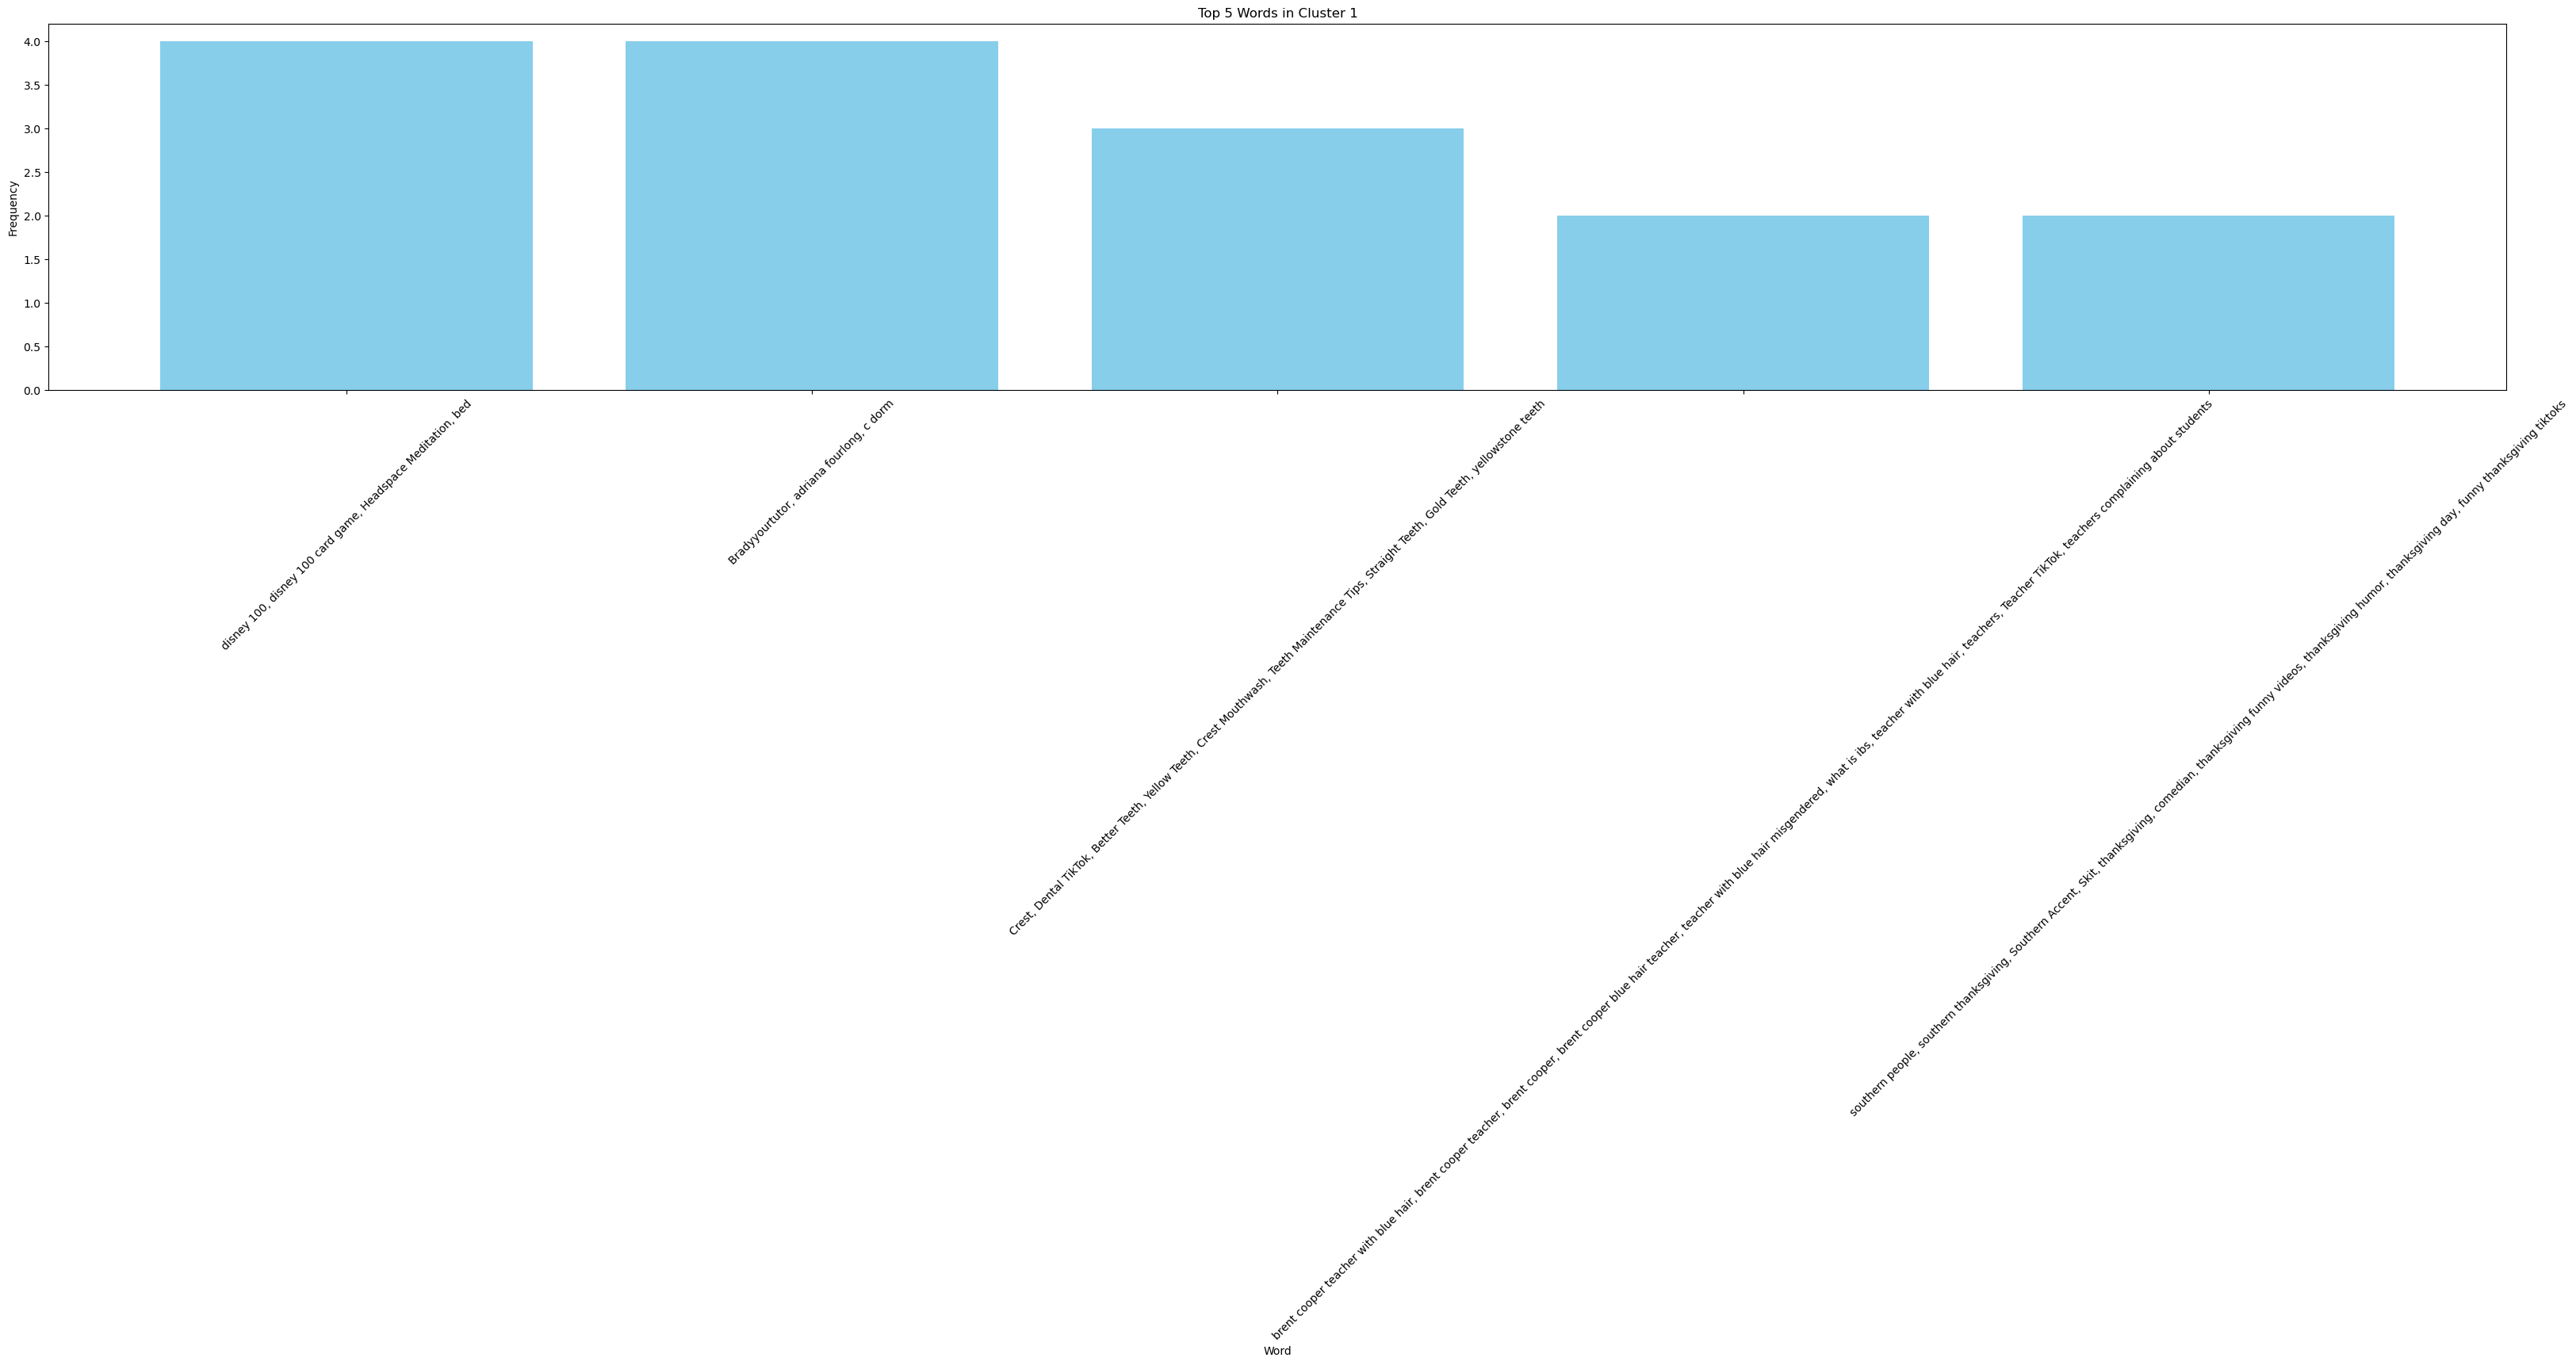

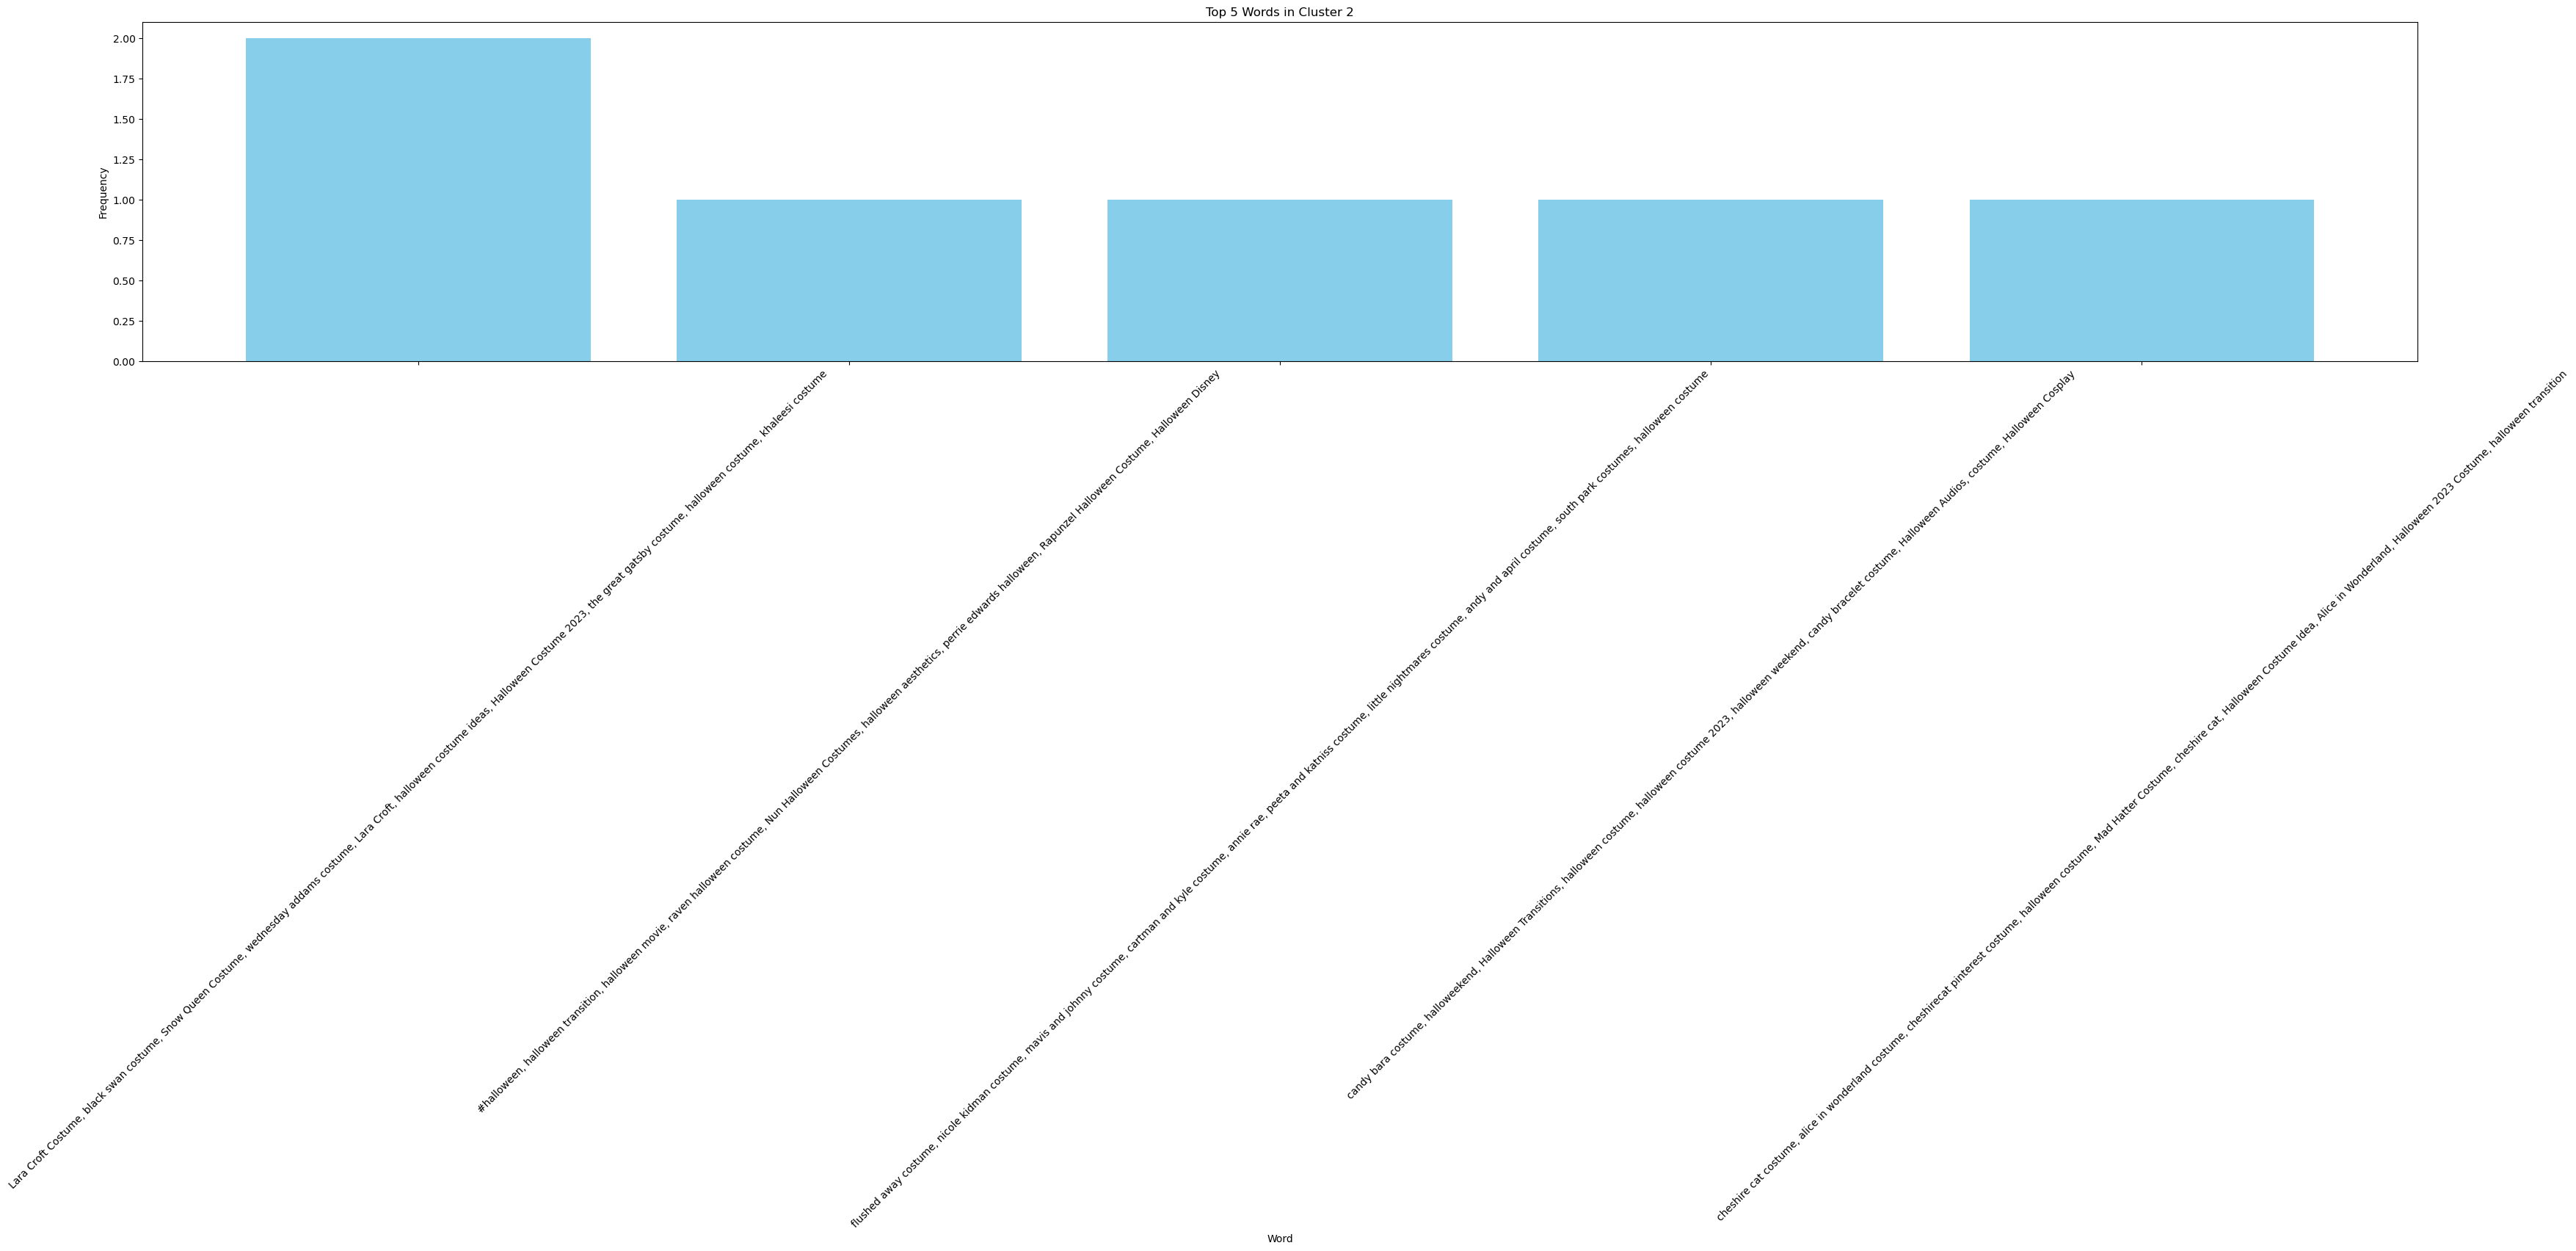

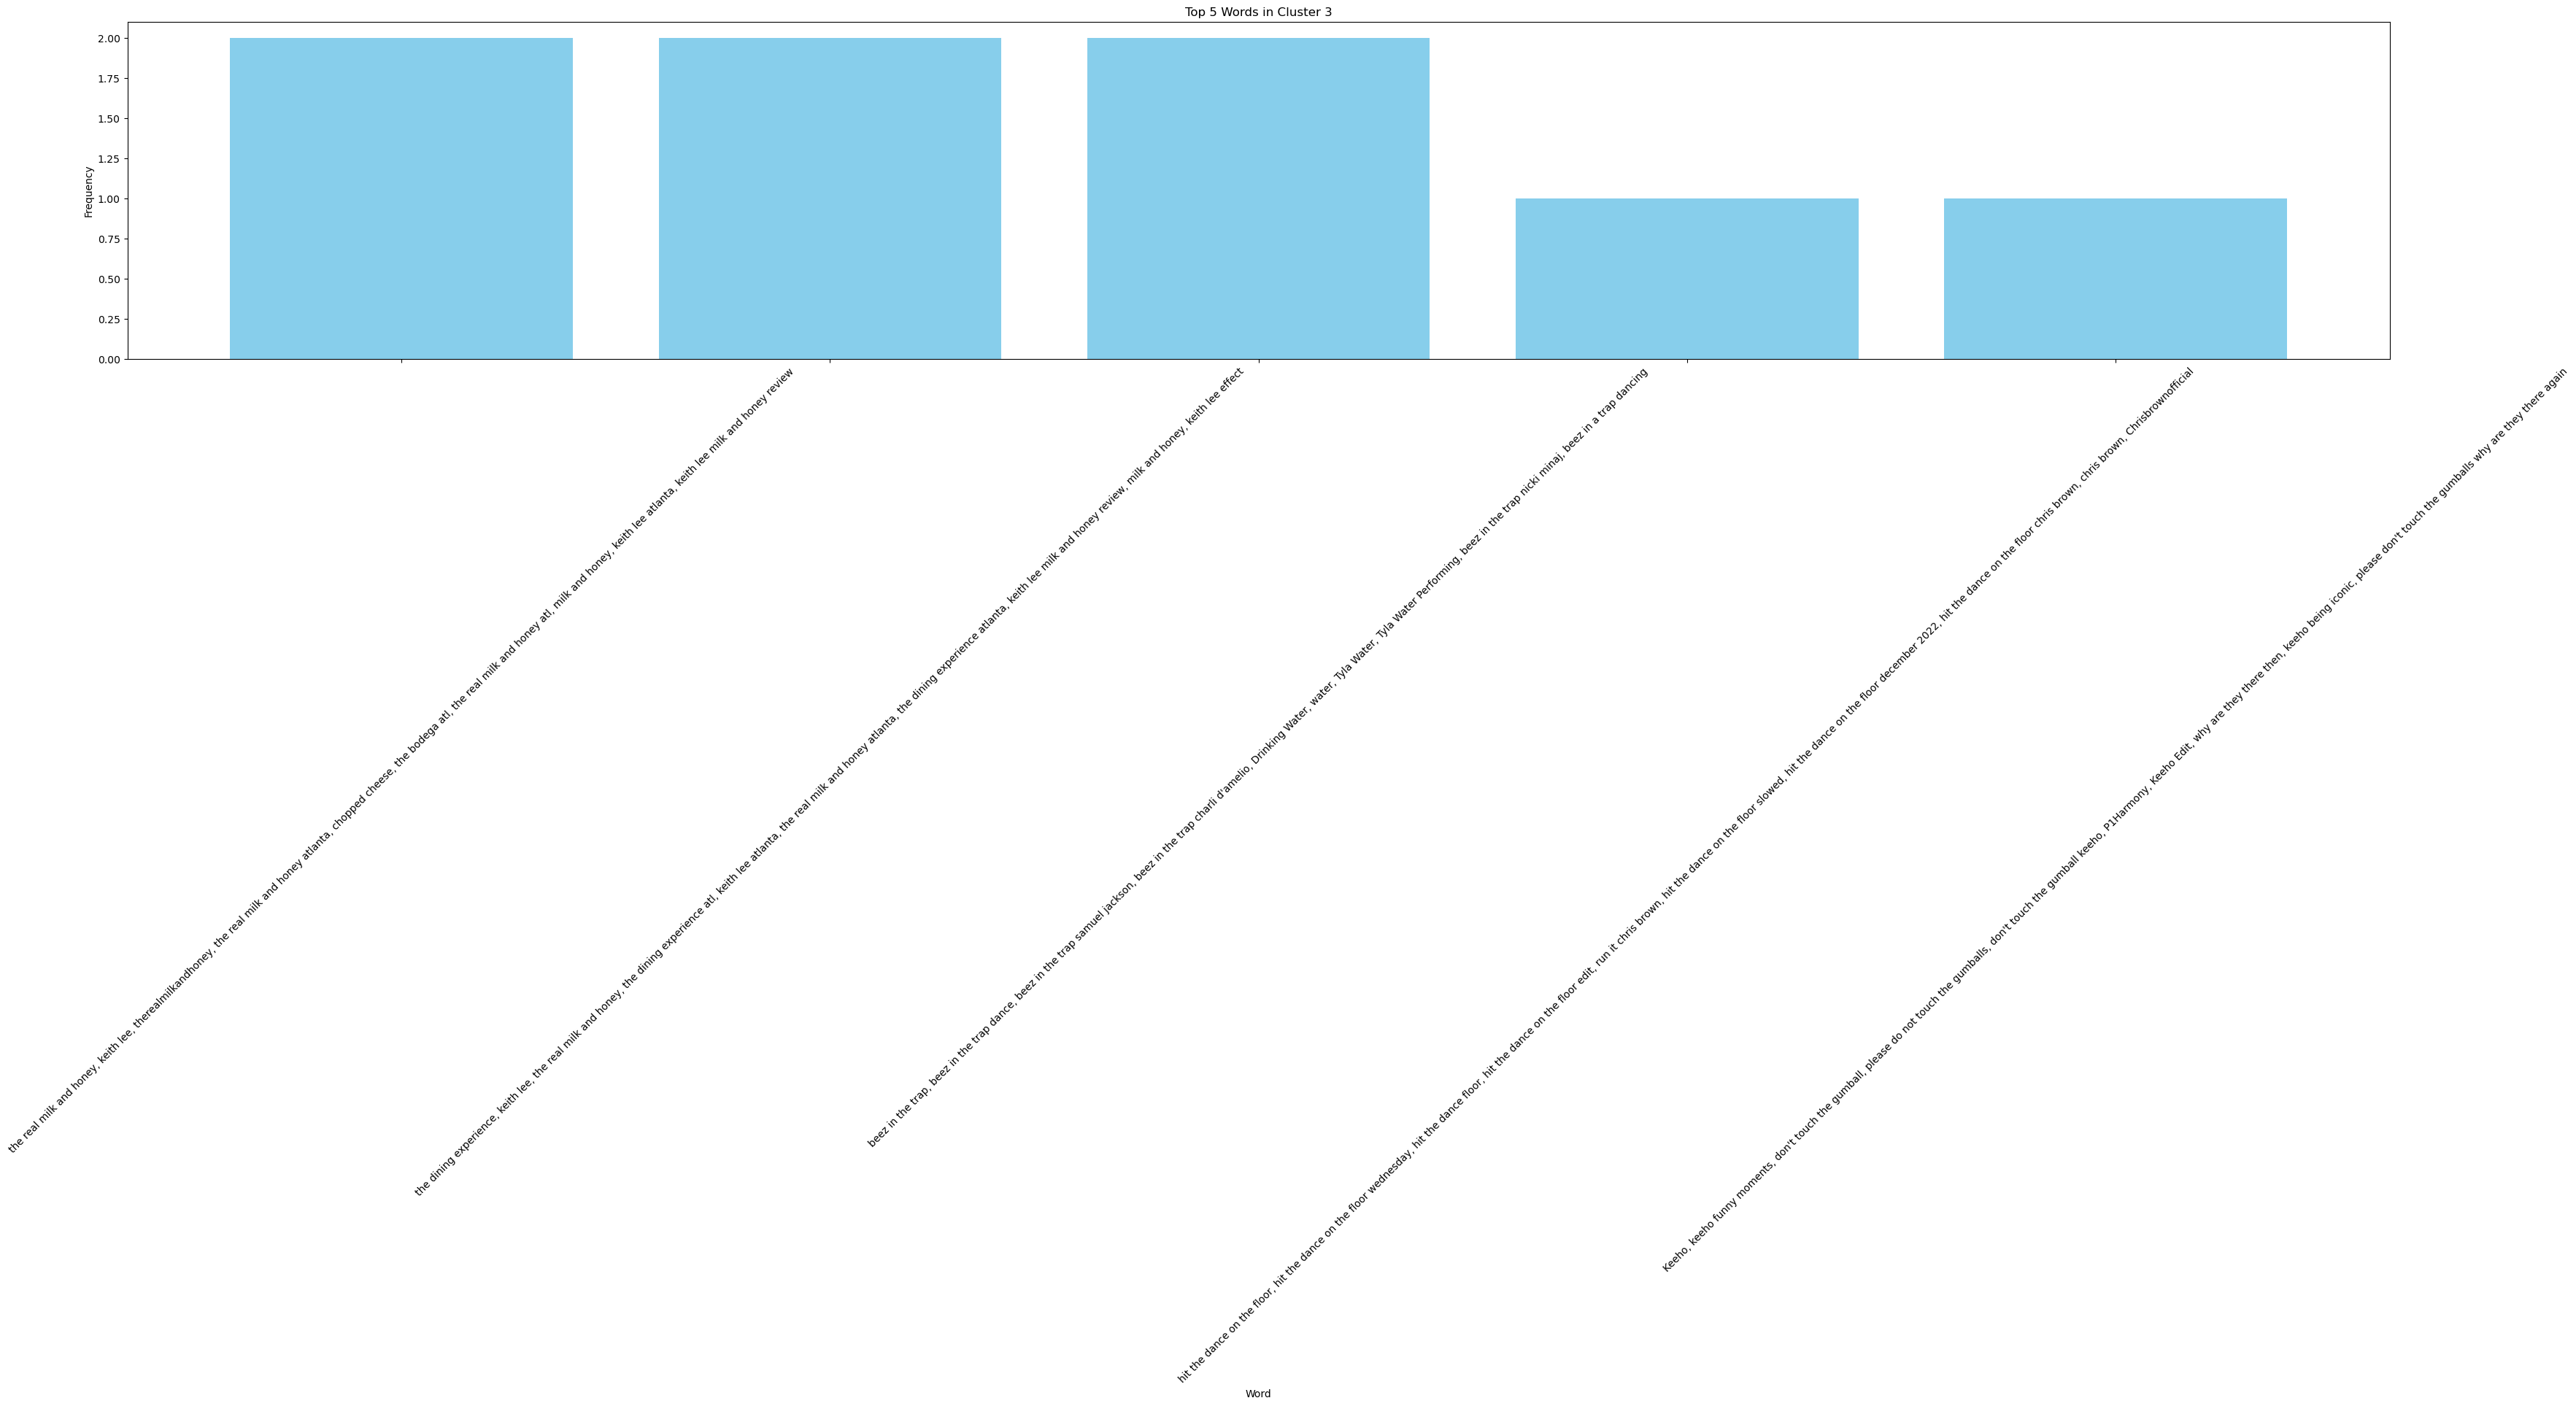

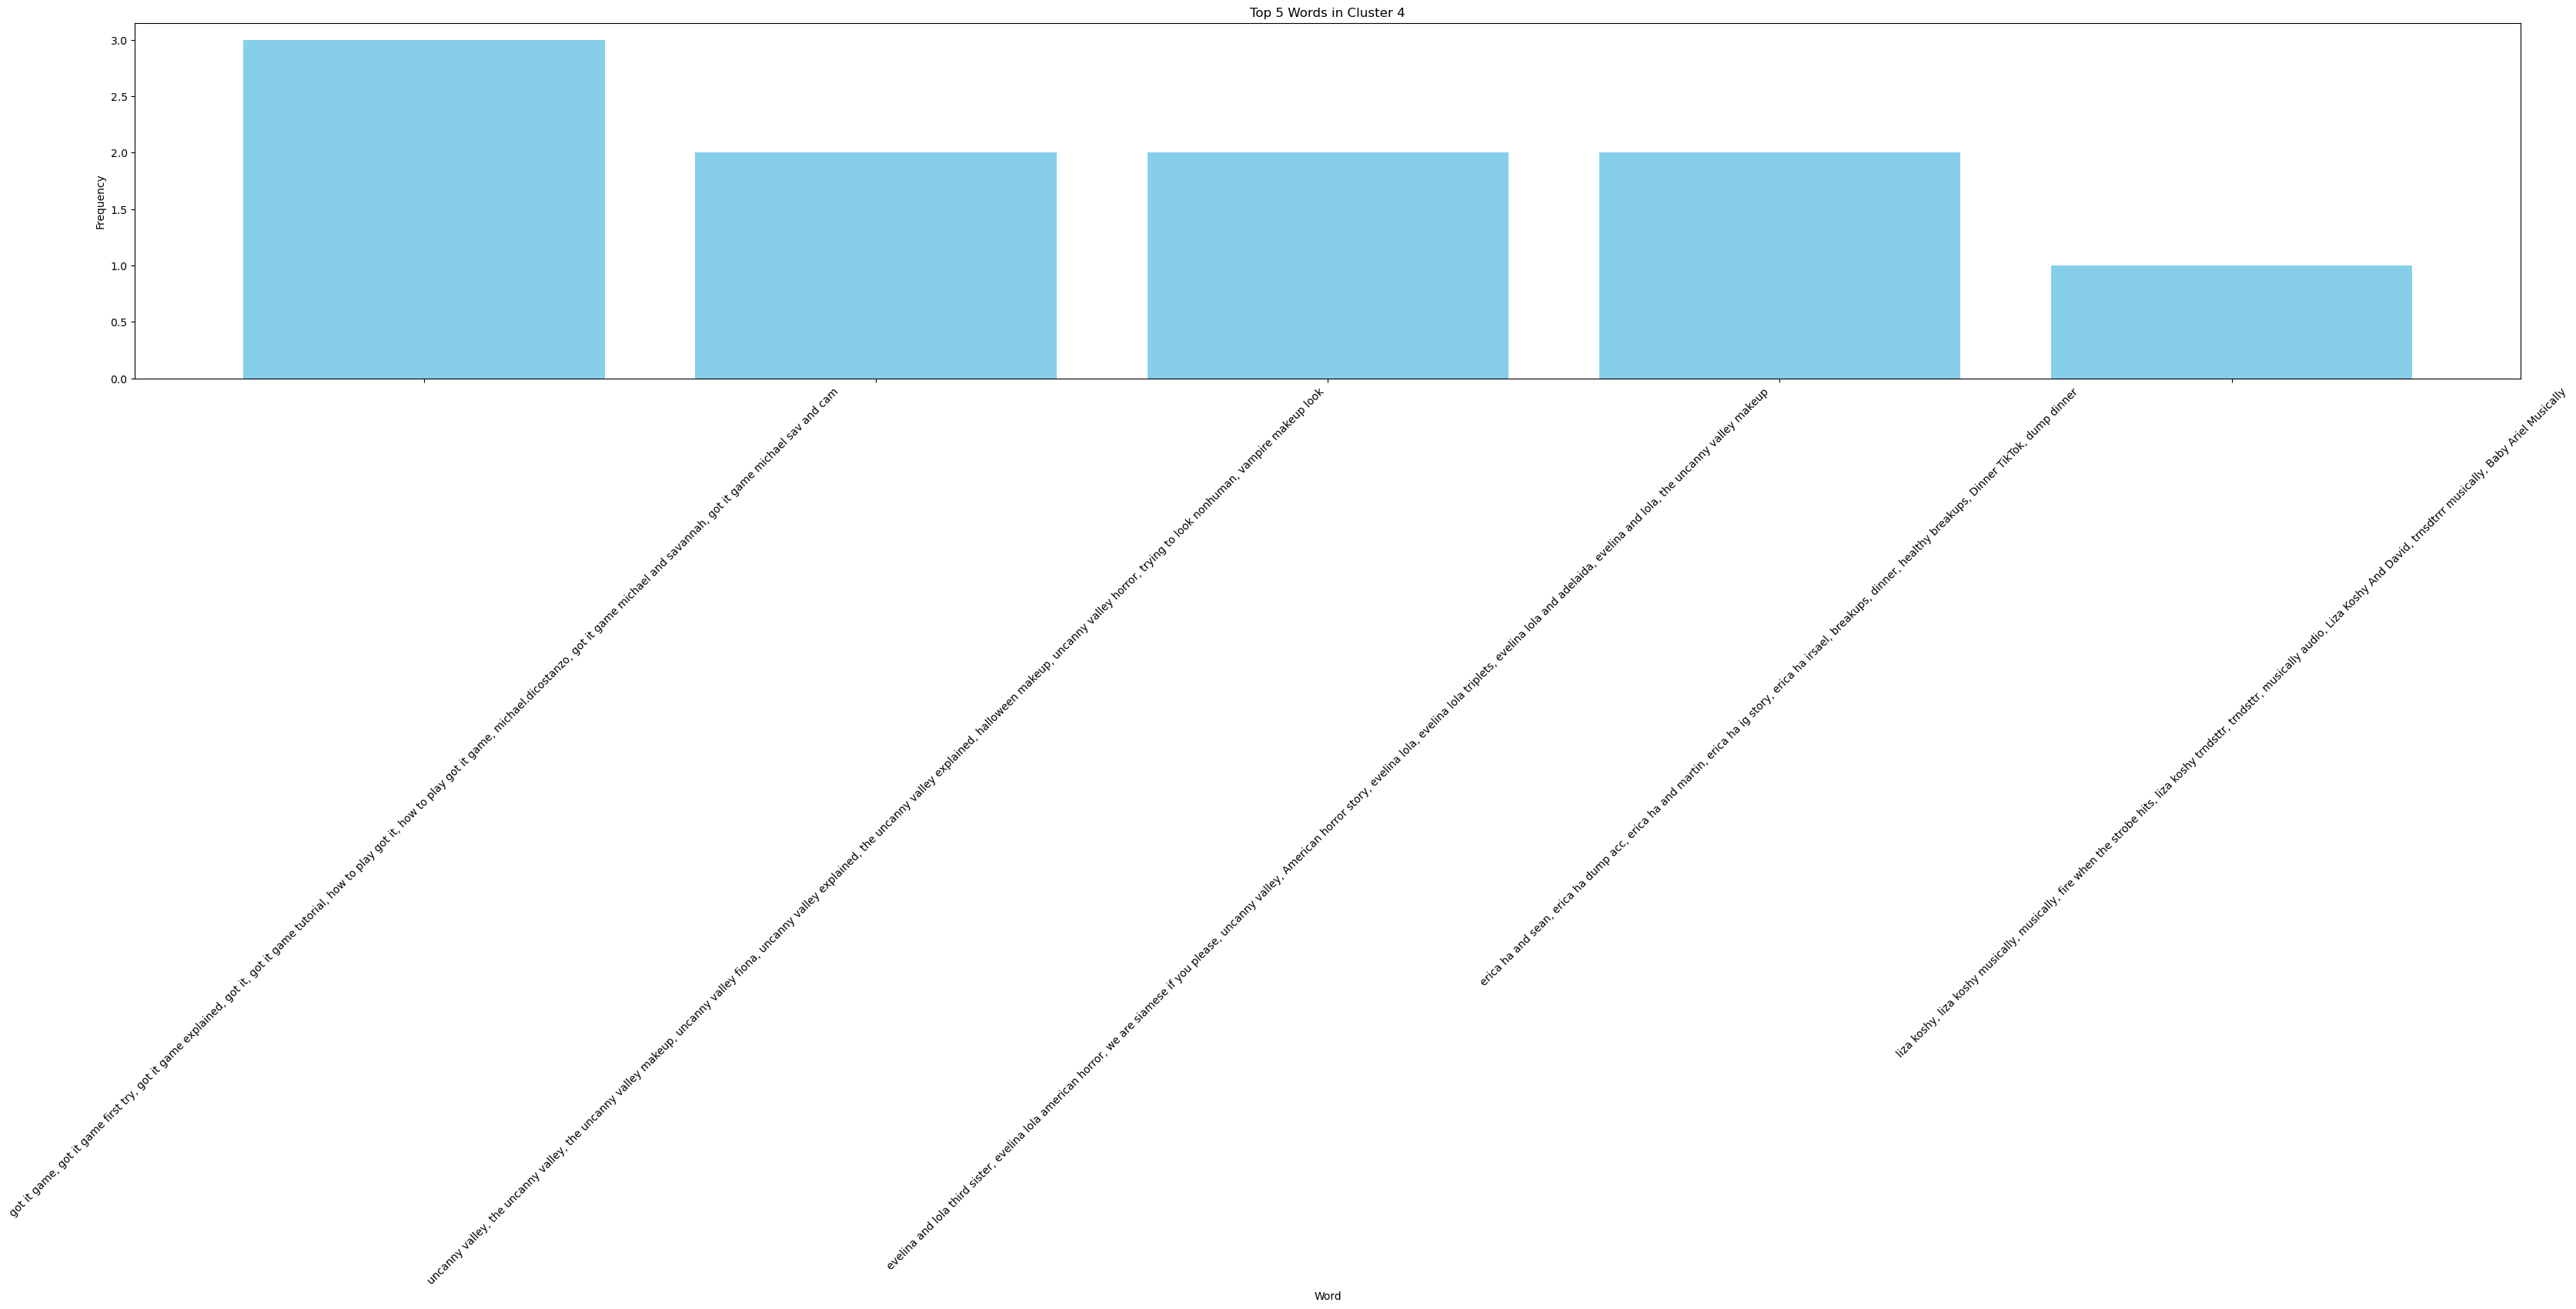

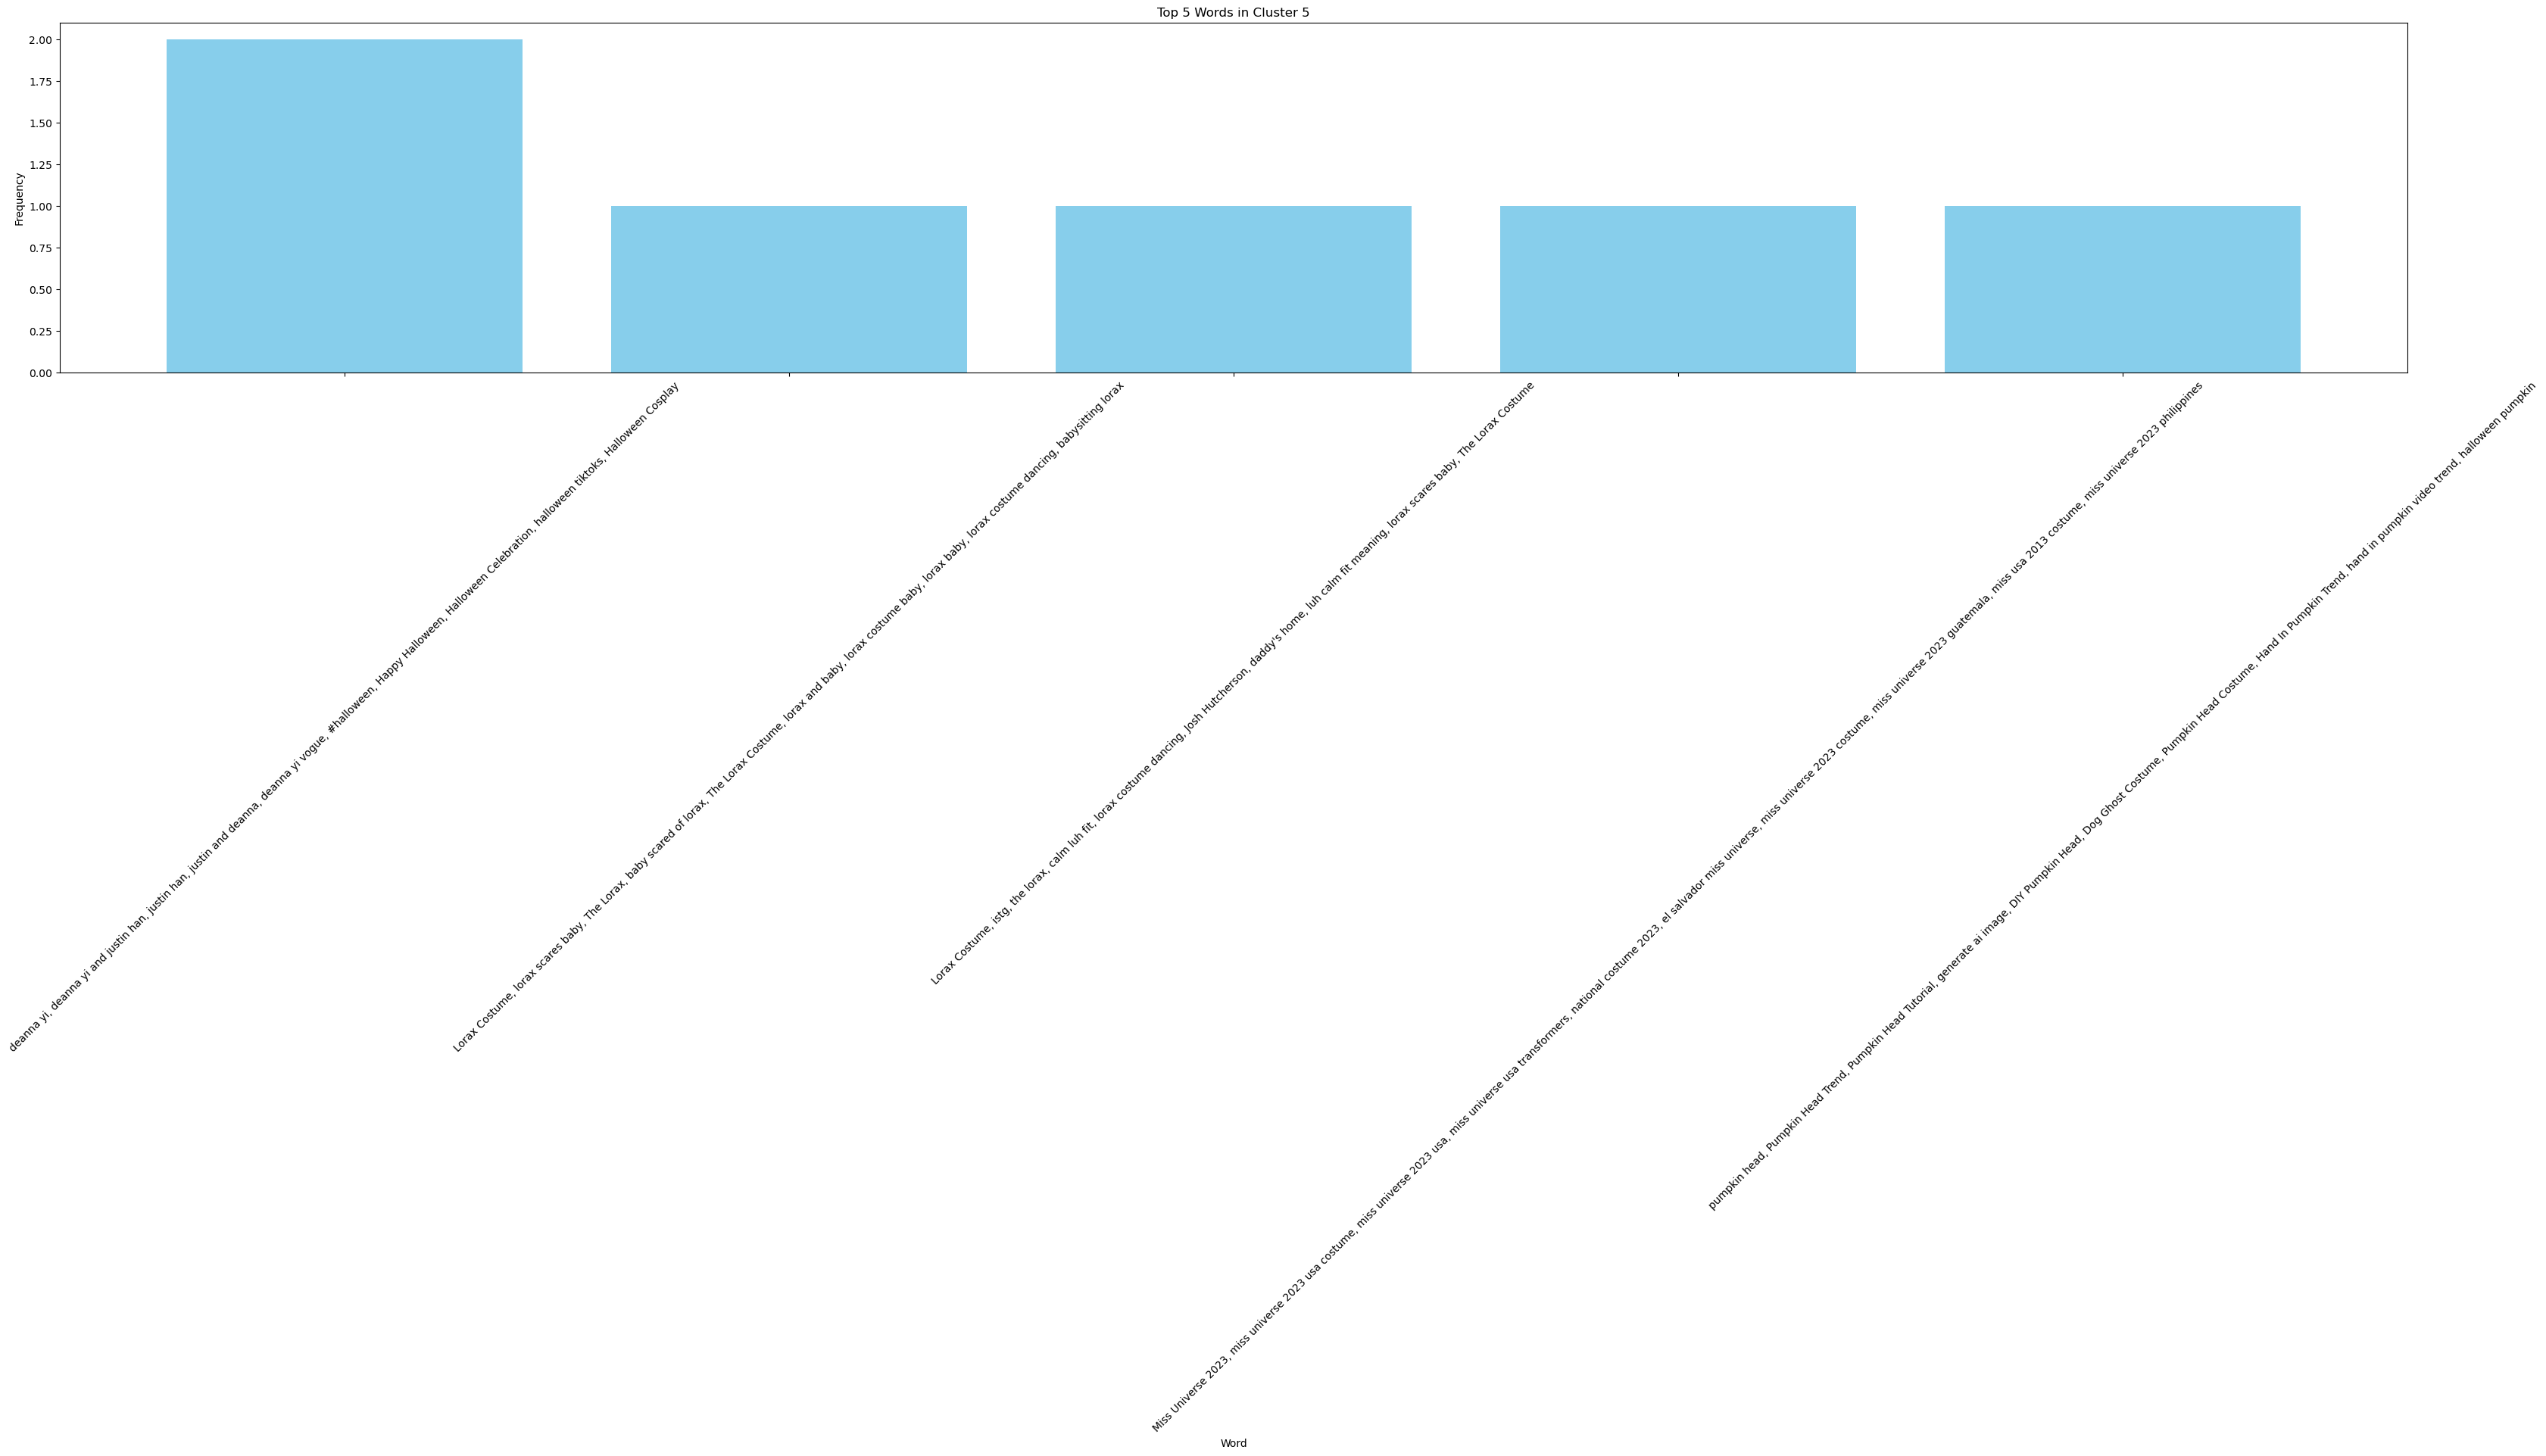

In [131]:
import matplotlib.pyplot as plt
from collections import Counter

# Define the number of top words to plot
N = 5

# Initialize a dictionary to store word frequencies for each cluster
cluster_word_freq = {}

# Calculate word frequencies for each cluster
for cluster_num in range(k):
    cluster_words = [filtered_word_list[i] for i, label in enumerate(kmeans.labels_) if label == cluster_num]
    word_counts = Counter(cluster_words)
    cluster_word_freq[cluster_num] = word_counts

# Plot word frequencies for each cluster
for cluster_num, word_freq in cluster_word_freq.items():
    # Sort word frequencies in descending order
    sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True)[:N])
    
    # Plot bar plot
    plt.figure(figsize=(40, 6))
    plt.bar(sorted_word_freq.keys(), sorted_word_freq.values(), color='skyblue')
    plt.title(f"Top {N} Words in Cluster {cluster_num + 1}")
    plt.xlabel("Word")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Initialize a dictionary to store words for each cluster
cluster_words_dict = {cluster_num: [] for cluster_num in range(k)}

# Populate the dictionary with words for each cluster
for i, label in enumerate(kmeans.labels_):
    cluster_words_dict[label].append(filtered_word_list[i])

# Initialize a dictionary to store IDF scores for each cluster
idf_scores_per_cluster = {}

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()




In [135]:
# Calculate IDF scores for each cluster
for cluster_num, words in cluster_words_dict.items():
    # Fit the TF-IDF vectorizer on words in the cluster
    tfidf_matrix_cluster = tfidf_vectorizer.fit_transform(words)
    
    # Get feature names (words)
    feature_names_cluster = tfidf_vectorizer.get_feature_names_out()
    
    # Calculate IDF scores for words in the cluster
    idf_scores_cluster = np.log(tfidf_matrix_cluster.shape[0] / (1 + np.sum(tfidf_matrix_cluster > 0, axis=0)))
    
    # Store IDF scores for the cluster
    idf_scores_per_cluster[cluster_num] = idf_scores_cluster


In [137]:
idf_scores_cluster

matrix([[1.92789164, 3.314186  , 3.314186  , 2.06142304, 3.314186  ,
         3.314186  , 3.314186  , 3.314186  , 3.314186  , 3.314186  ,
         3.314186  , 3.314186  , 3.314186  , 3.314186  , 3.314186  ,
         1.52242654, 2.9087209 , 3.314186  , 2.62103882, 3.314186  ,
         3.314186  , 3.314186  , 2.9087209 , 2.9087209 , 3.314186  ,
         3.314186  , 3.314186  , 3.314186  , 3.314186  , 3.314186  ,
         2.9087209 , 2.9087209 , 3.314186  , 3.314186  , 3.314186  ,
         2.9087209 , 3.314186  , 3.314186  , 2.9087209 , 2.9087209 ,
         3.314186  , 3.314186  , 3.314186  , 3.314186  , 3.314186  ,
         2.9087209 , 2.9087209 , 3.314186  , 3.314186  , 3.314186  ,
         3.314186  , 3.314186  , 3.314186  , 3.314186  , 2.62103882,
         3.314186  , 3.314186  , 2.9087209 , 3.314186  , 3.314186  ,
         3.314186  , 2.62103882, 3.314186  , 2.9087209 , 3.314186  ,
         3.314186  , 3.314186  , 3.314186  , 3.314186  , 2.39789527,
         3.314186  , 3.314186  , 3

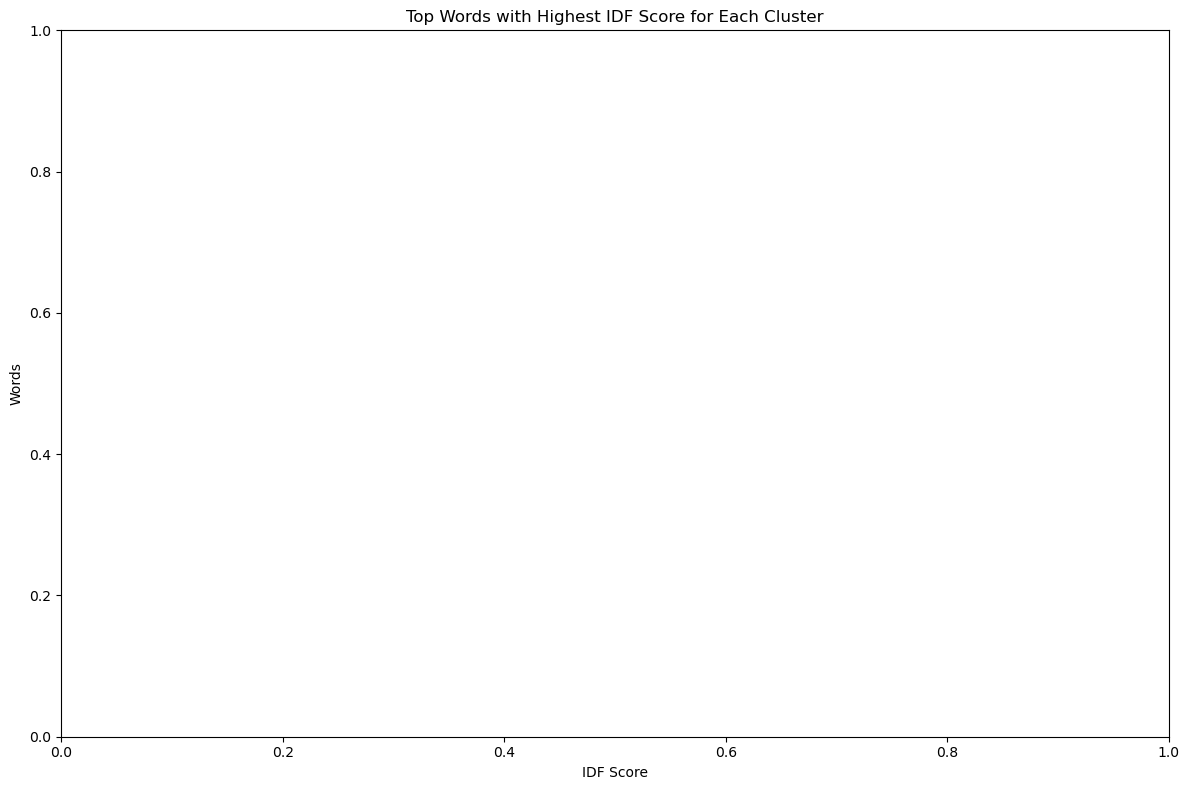

In [143]:
# Initialize a figure and axes
plt.figure(figsize=(12, 8))

# Initialize a boolean variable to track if any bars were plotted
bars_plotted = False

# Iterate over each cluster
for cluster_num in range(k):
    # Get IDF scores for the current cluster
    idf_scores_cluster = idf_scores_per_cluster[cluster_num]
    
    # Get feature names (words)
    feature_names_cluster = tfidf_vectorizer.get_feature_names_out()
    
    # Ensure that the size of IDF scores matches the size of feature names
    idf_scores_cluster = idf_scores_cluster.squeeze()
    
    # Check if the size of IDF scores matches the size of feature names
    if len(idf_scores_cluster) != len(feature_names_cluster):
        continue  # Skip current cluster if sizes do not match
    
    # Sort feature names based on IDF scores
    sorted_feature_names = [feature_names_cluster[i] for i in np.argsort(idf_scores_cluster)[::-1]]
    
    # Select the top N words with highest IDF scores
    top_words = sorted_feature_names[:N]
    
    # Plot bar chart for the current cluster if there are words to plot
    if len(top_words) > 0:
        bars_plotted = True
        plt.barh([f'Cluster {cluster_num+1} - {word}' for word in top_words], idf_scores_cluster[np.argsort(idf_scores_cluster)[::-1]][:N], label=f'Cluster {cluster_num+1}')

# Set labels and title
plt.xlabel('IDF Score')
plt.ylabel('Words')
plt.title('Top Words with Highest IDF Score for Each Cluster')

# Add legend if bars were plotted
if bars_plotted:
    plt.legend()

# Show plot
plt.tight_layout()
plt.show()






In [ ]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(idf_scores_df, cmap='viridis', annot=True, fmt=".2f")
plt.title('IDF Scores for Words in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Words')
plt.xticks(ticks=np.arange(k) + 0.5, labels=[f'Cluster {i+1}' for i in range(k)], rotation=0)
plt.tight_layout()
plt.show()

In [136]:
# Print IDF scores for each cluster
for cluster_num, idf_scores_cluster in idf_scores_per_cluster.items():
    print(f"Cluster {cluster_num + 1} IDF Scores:")
    for word, idf_score in zip(feature_names_cluster, idf_scores_cluster.flat):
        print(f"{word}: {idf_score:.4f}")
    print()

Cluster 1 IDF Scores:
100: 6.2196
2007: 6.9127
2013: 5.4087
2023: 2.9238
aaron: 6.9127
academia: 6.9127
ace: 6.5073
actor: 6.9127
adventurer: 6.2196
ai: 6.9127
aiura: 5.6600
alexander: 6.9127
allegations: 6.9127
amanda: 6.2196
american: 6.9127
and: 6.9127
angel: 6.9127
angels: 6.9127
anime: 6.9127
ant: 6.9127
aquamarine: 6.9127
are: 6.9127
audios: 5.3033
baby: 6.5073
babysitting: 6.2196
backstory: 6.9127
bad: 6.9127
bag: 5.9965
balm: 6.5073
band: 6.9127
be: 6.5073
bear: 6.9127
being: 6.9127
betty: 5.4087
bighit: 6.2196
bird: 5.9965
black: 3.7347
blair: 6.2196
bloom: 6.9127
blue: 6.9127
board: 6.2196
bob: 6.9127
body: 6.5073
boop: 6.5073
braid: 6.9127
bretman: 6.9127
bretmanrock: 6.5073
bro: 6.9127
broadway: 6.9127
burr: 6.5073
calm: 6.2196
can: 6.9127
candy: 6.2196
cant: 6.9127
card: 6.9127
cascades: 5.8141
catrina: 6.9127
celebration: 6.9127
chapulin: 6.9127
chapulín: 6.9127
charcuterie: 6.9127
chicken: 6.5073
chopper: 6.5073
choso: 6.9127
chucky: 6.9127
cinderella: 6.5073
claire: 5.9

In [126]:
from collections import Counter

# Initialize a dictionary to store the summaries for each cluster
cluster_summaries = {}

# Calculate the most frequent word for each cluster
for cluster_num in range(k):
    # Filter the word list for the current cluster
    cluster_word_list = [word for i, word in enumerate(filtered_word_list) if kmeans.labels_[i] == cluster_num]
    
    # Count the frequency of each word
    word_counts = Counter(cluster_word_list)
    
    # Get the most frequent word
    most_frequent_word = max(word_counts, key=word_counts.get)
    
    # Store the most frequent word as the summary for the cluster
    cluster_summaries[cluster_num] = most_frequent_word

# Print summaries for each cluster
for cluster_num, summary_word in cluster_summaries.items():
    print(f"Cluster {cluster_num}: Summary = {summary_word}")
 

Cluster 0: Summary = disney 100, disney 100 card game, Headspace Meditation, bed
Cluster 1: Summary = Lara Croft Costume, black swan costume, Snow Queen Costume, wednesday addams costume, Lara Croft, halloween costume ideas, Halloween Costume 2023, the great gatsby costume, halloween costume, khaleesi costume
Cluster 2: Summary = the real milk and honey, keith lee, therealmilkandhoney, the real milk and honey atlanta, chopped cheese, the bodega atl, the real milk and honey atl, milk and honey, keith lee atlanta, keith lee milk and honey review
Cluster 3: Summary = got it game, got it game first try, got it game explained, got it, got it game tutorial, how to play got it, how to play got it game, michael.dicostanzo, got it game michael and savannah, got it game michael sav and cam
Cluster 4: Summary = deanna yi, deanna yi and justin han, justin han, justin and deanna, deanna yi vogue, #halloween, Happy Halloween, Halloween Celebration, halloween tiktoks, Halloween Cosplay


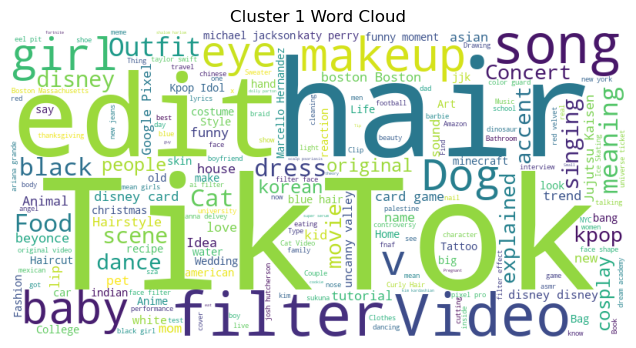

In [122]:
# Example: Access word cloud for cluster 0
wordcloud_cluster_0 = cluster_wordclouds[0]
# You can then display or save the word cloud as needed
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_cluster_0)
plt.title("Cluster 1 Word Cloud")
plt.axis("off")
plt.show()

In [71]:
from nltk.tokenize import word_tokenize
from collections import Counter


In [73]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/naima.abdirahman/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [74]:
# Function to extract most frequent word from a string
def extract_most_frequent_word(text):
    # Tokenize the text
    words = word_tokenize(text)
    # Count the frequency of each word
    word_counts = Counter(words)
    # Get the most frequent word
    most_common_word = word_counts.most_common(1)
    if most_common_word:
        return most_common_word[0][0]
    else:
        return None

# Apply the function to each row in the DataFrame
df['one_word_description'] = df['video_description'].apply(extract_most_frequent_word)

# Display the DataFrame
print(df)


         tsne_1     tsne_2                                  video_description  \
0      8.547387  31.733204  Grey’s Anatomy; Perfect Penny..Pt 1 Szn 12 epi...   
1    -35.867340  45.254608   #hamsterfish #viralvintage #hamstertok #fishtok    
2     41.029114  45.896614  Fish tank hamster cage, crazy illusion #fyp #f...   
3    -30.992586   9.133968               How is that even possible!!🤔 #reels    
4     40.989594  45.849586   The little hamster lives in a fish tank 小仓鼠住在鱼缸里   
...         ...        ...                                                ...   
8174  49.636238 -30.135433  #greenscreen Yes I did catch him, yoy can see ...   
8175 -23.797005 -24.802092  i have had two male science teachers IN A ROW ...   
8176  52.566528 -11.622276  Do y’all hear that? It sounds like SOTY 🗣️‼️ #...   
8177  25.903379 -33.496727  a beautiful start to my weekend with #Burberry...   
8178   0.276979  -7.524058  the screams for cinna and finick GAH #hungerga...   

      cluster one_word_desc

In [ ]:
# Create the scatter plot
import plotly.express as px
fig = px.scatter(df, x='tsne_1', y='tsne_2', text='video_description', color="cluster", color_continuous_scale="BlueRed")

# Format what to show next to the markers
fig.update_traces(textposition='top center', 
                  mode='markers+text', 
                  textfont=dict(size=6))

fig.update_layout(title='Embeddings of TikTokh hashtags for 10 users', width=800, height=800)
fig.show()

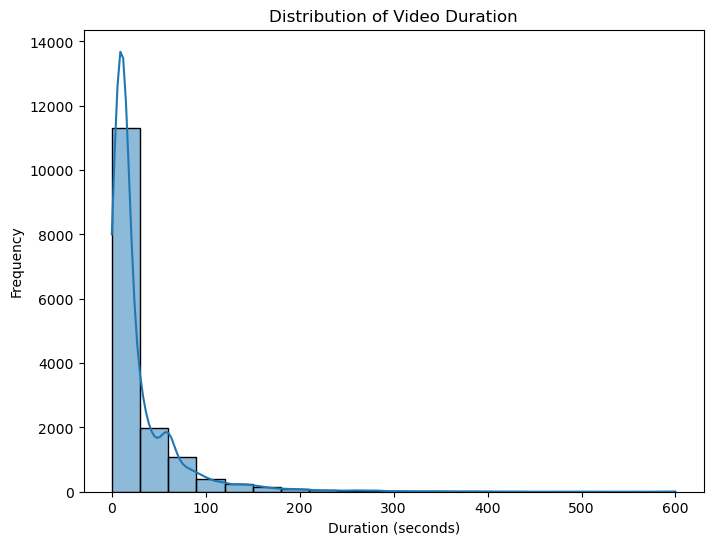

In [68]:

import seaborn as sns

# Load the original data
data = pd.read_csv("/Users/naima.abdirahman/Downloads/project3data/Sec2Gr3_77217.csv")

# Histogram of video duration
plt.figure(figsize=(8, 6))
sns.histplot(data['video_duration'], bins=20, kde=True)
plt.title('Distribution of Video Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()



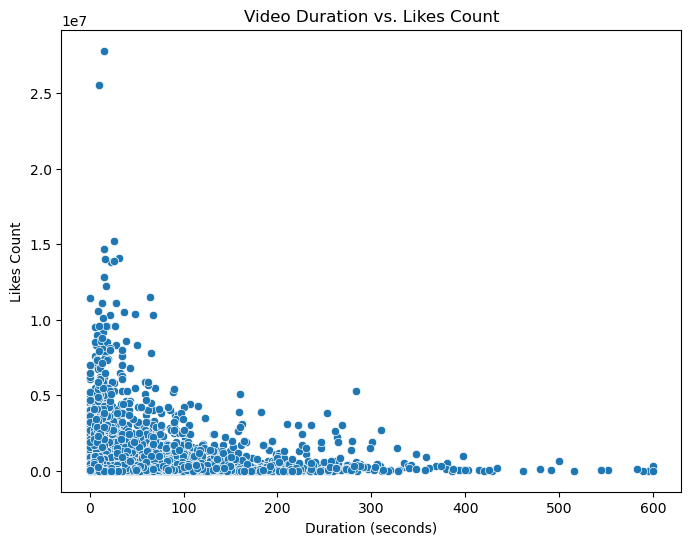

In [69]:
# Scatter plot of video duration vs. likes count
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='video_duration', y='video_diggcount')
plt.title('Video Duration vs. Likes Count')
plt.xlabel('Duration (seconds)')
plt.ylabel('Likes Count')
plt.show()